---
#**Stock Market Analysis with the use of Networks**
---

In the folowing Notebook I tried to identify and analyze the relationships between different stocks in the S&P 500 index using network theory and statistical methods.

---
## **Approach**
---

- Collect the stock data for all S&P 500 components from 04/January/2010 till 29/December/2023 from yahoo finance.
- Compute log returns for the S&P 500 components for same time period
- Compute the **correlation matrix** for the above log returns
- Find out the **Top n central and peripheral stocks** based on the following network topological parameters:
    - Degree centrality
    - Closeness centrality
    - Betweenness centrality
    - Eigenvector centrality
    - Distance on Degree Criterion
    - Distance on Correlation Criterion
    - Distance on Distance Criterion
    - Closeness and Eigenvector Centrality
    - Normalize and combine centrality scores
    - Ranking of Stocks using Centrality and Distance-Based Metrics

- Simulate the performance of Central and Peripheral portfolios against new historical data of the year 2024 for the S&P 500.

---
Note: This is an open-source notebook that I developed for my personal research as a Data Scientist, it's purpose is not intended for investment recommendations or propositions.


---

## **Loading the Libraries**

In [ ]:
# First lets install the libraries
import tqdm
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Load the data**

In [ ]:
# Read the csv Data file using Pandas
stock_data = pd.read_csv('/content/drive/SP500_price_data_2010_to_2023.csv', index_col=[0])


## **Visualize the Price Data for all the S&P 500 of 14 years till 29 December2023**

In [ ]:
stock_data

MMM        AOS         ABT        ABBV  ABMD         ACN  \
Date                                                                         
2010-01-04  69.414719   7.435000   26.129908         NaN  8.74   42.070000   
2010-01-05  68.979935   7.340000   25.918797         NaN  8.53   42.330002   
2010-01-06  69.958191   7.343333   26.062737         NaN  8.40   42.779999   
2010-01-07  70.008362   7.365000   26.278646         NaN  8.40   42.740002   
2010-01-08  70.501671   7.473333   26.412991         NaN  8.23   42.570000   
...               ...        ...         ...         ...   ...         ...   
2023-12-22  88.904678  81.730003  109.029999  154.940002   NaN  354.450012   
2023-12-26  90.392975  81.849998  109.230003  154.619995   NaN  353.429993   
2023-12-27  90.919731  82.160004  109.790001  154.880005   NaN  353.820007   
2023-12-28  91.714050  82.239998  110.400002  154.750000   NaN  351.589996   
2023-12-29  91.404678  82.440002  110.070000  154.970001   NaN  350.910004   

            ATVI        ADM        ADBE         ADP  ...       WYNN  \
Date                                                 ...              
2010-01-04   NaN  31.469999   37.090000   37.603161  ...  63.959999   
2010-01-05   NaN  31.639999   37.700001   37.401230  ...  67.849998   
2010-01-06   NaN  31.559999   37.619999   37.313435  ...  66.959999   
2010-01-07   NaN  31.230000   36.889999   37.295876  ...  68.389999   
2010-01-08   NaN  30.840000   36.689999   37.243195  ...  67.900002   
...          ...        ...         ...         ...  ...        ...   
2023-12-22   NaN  71.459999  598.750000  230.970001  ...  90.419998   
2023-12-26   NaN  72.389999  598.260010  232.539993  ...  91.000000   
2023-12-27   NaN  72.169998  596.080017  231.610001  ...  90.629997   
2023-12-28   NaN  72.269997  595.520020  232.490005  ...  91.760002   
2023-12-29   NaN  72.220001  596.599976  232.970001  ...  91.110001   

                  XEL         XYL         YUM        ZBRA         ZBH  \
Date                                                                    
2010-01-04  21.080000         NaN   25.226456   28.670000   58.271847   
2010-01-05  20.830000         NaN   25.140186   28.620001   60.116505   
2010-01-06  20.870001         NaN   24.960461   28.400000   60.097088   
2010-01-07  20.780001         NaN   24.953272   27.690001   61.475727   
2010-01-08  20.790001         NaN   24.960461   27.600000   60.184467   
...               ...         ...         ...         ...         ...   
2023-12-22  62.060001  112.639999  130.000000  269.410004  120.559998   
2023-12-26  62.250000  113.620003  130.259995  275.500000  121.419998   
2023-12-27  61.540001  114.379997  130.839996  275.790009  121.129997   
2023-12-28  61.889999  114.320000  130.520004  275.350006  121.629997   
2023-12-29  61.910000  114.360001  130.660004  273.329987  121.699997   

                 ZION         ZTS         CEG    OGN  
Date                                                  
2010-01-04  13.330000         NaN         NaN    NaN  
2010-01-05  13.800000         NaN         NaN    NaN  
2010-01-06  15.000000         NaN         NaN    NaN  
2010-01-07  16.680000         NaN         NaN    NaN  
2010-01-08  16.410000         NaN         NaN    NaN  
...               ...         ...         ...    ...  
2023-12-22  44.000000  194.979996  115.330002  13.91  
2023-12-26  44.880001  195.500000  117.570000  14.13  
2023-12-27  44.509998  196.899994  117.419998  14.36  
2023-12-28  44.660000  197.160004  117.110001  14.48  
2023-12-29  43.869999  197.369995  116.889999  14.42  

[3522 rows x 504 columns]

## **Missing Data**
There are Missing data since certain stocks may move out of the S&P 500 and certain stocks may enter the S&P 500 during this period.


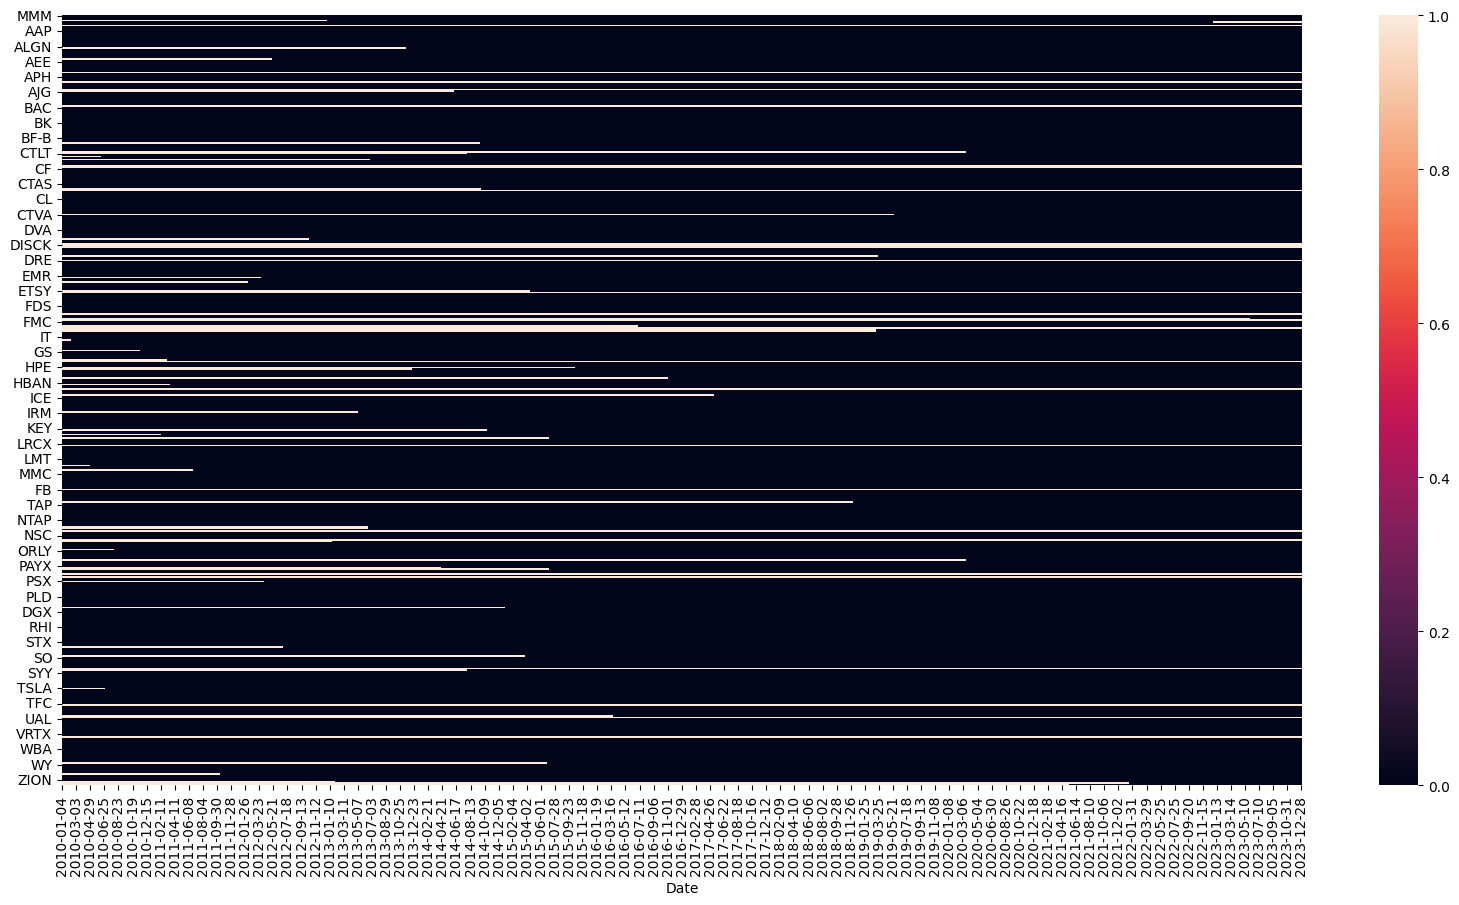

In [ ]:
#create a heatmap visualization to display missing values in the stock_data DataFrame.
figure = plt.figure(figsize=(20, 10))
sns.heatmap(stock_data.T.isnull());

In [ ]:
#clean the DataFrame stock_data by removing columns that contain any missing values
stock_data_cleaned = stock_data.dropna(axis=1)

#### The null values are removed - the data is clean and the plot below helps in finding that there are no missing values anymore.

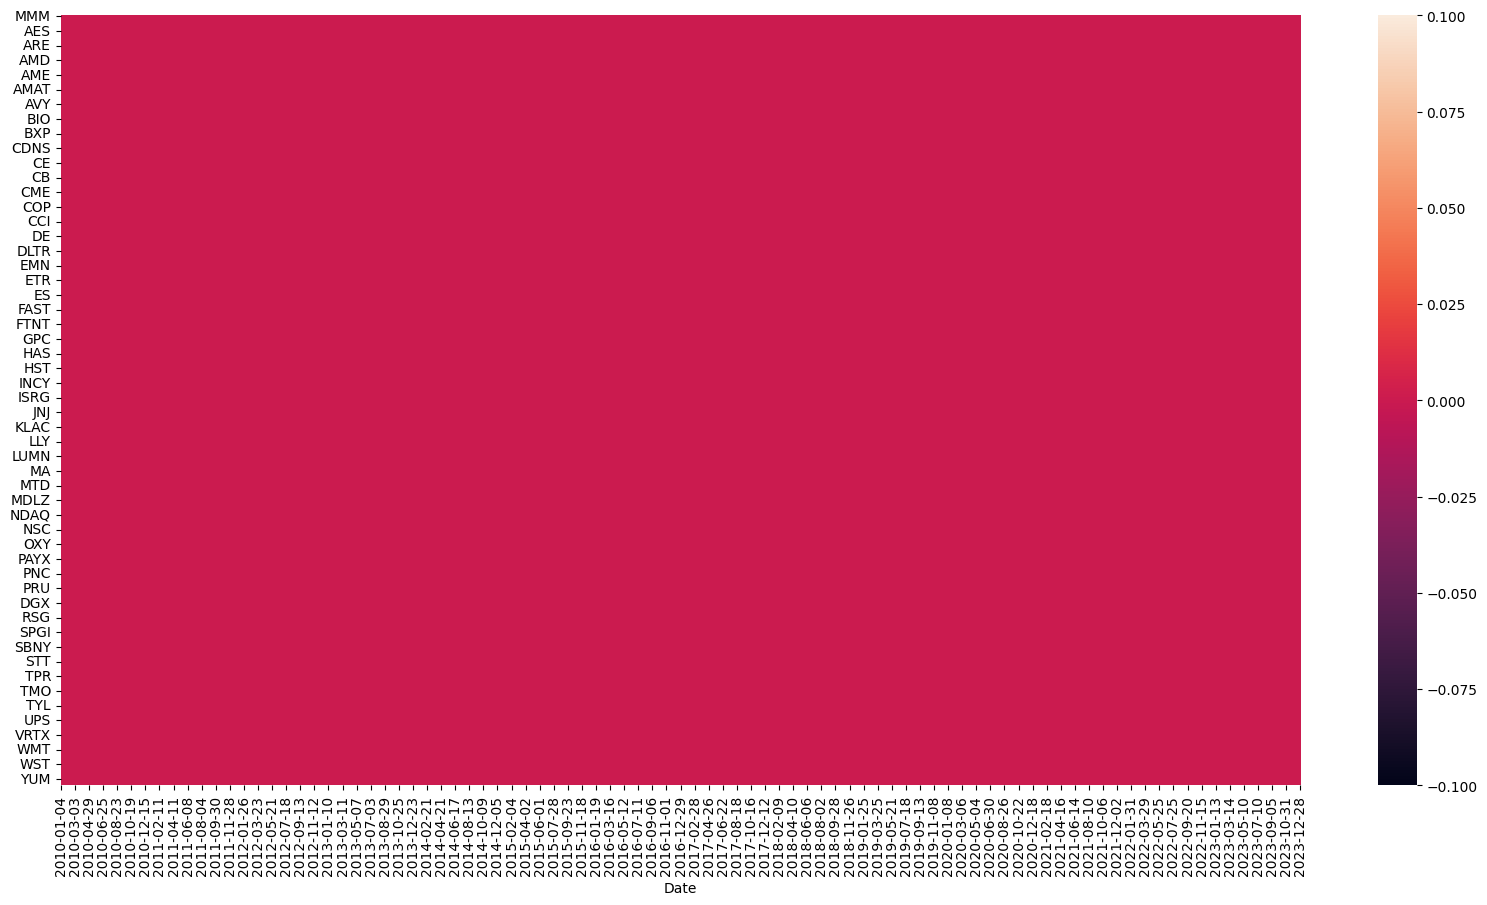

In [ ]:
# Plot the heatmap
figure = plt.figure(figsize=(20, 10))
sns.heatmap(stock_data_cleaned.T.isnull());

## **Getting Yearwise Data**

Breaking down stock data by year will help to see it clearer also it is easier to understand market changes.

In [ ]:
# Define the function to get year-wise S&P 500 data
def get_year_wise_snp_500_data(data, year):
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    year_wise_data = data.loc[start_date:end_date]
    return year_wise_data

# Separate variable for each year containing the data specifically for that year.
snp_500_2010 = get_year_wise_snp_500_data(stock_data_cleaned, 2010)
snp_500_2011 = get_year_wise_snp_500_data(stock_data_cleaned, 2011)
snp_500_2012 = get_year_wise_snp_500_data(stock_data_cleaned, 2012)
snp_500_2013 = get_year_wise_snp_500_data(stock_data_cleaned, 2013)
snp_500_2014 = get_year_wise_snp_500_data(stock_data_cleaned, 2014)
snp_500_2015 = get_year_wise_snp_500_data(stock_data_cleaned, 2015)
snp_500_2016 = get_year_wise_snp_500_data(stock_data_cleaned, 2016)
snp_500_2017 = get_year_wise_snp_500_data(stock_data_cleaned, 2017)
snp_500_2018 = get_year_wise_snp_500_data(stock_data_cleaned, 2018)
snp_500_2019 = get_year_wise_snp_500_data(stock_data_cleaned, 2019)
snp_500_2020 = get_year_wise_snp_500_data(stock_data_cleaned, 2020)
snp_500_2021 = get_year_wise_snp_500_data(stock_data_cleaned, 2021)
snp_500_2022 = get_year_wise_snp_500_data(stock_data_cleaned, 2022)
snp_500_2023 = get_year_wise_snp_500_data(stock_data_cleaned, 2023)

In [ ]:
#looking at the matrix for 2010
snp_500_2010

MMM       AOS        ABT        ACN        ADM       ADBE  \
Date                                                                          
2010-01-04  69.414719  7.435000  26.129908  42.070000  31.469999  37.090000   
2010-01-05  68.979935  7.340000  25.918797  42.330002  31.639999  37.700001   
2010-01-06  69.958191  7.343333  26.062737  42.779999  31.559999  37.619999   
2010-01-07  70.008362  7.365000  26.278646  42.740002  31.230000  36.889999   
2010-01-08  70.501671  7.473333  26.412991  42.570000  30.840000  36.689999   
...               ...       ...        ...        ...        ...        ...   
2010-12-27  72.750839  9.722500  22.732924  48.250000  30.090000  30.950001   
2010-12-28  72.525085  9.637500  22.737722  47.980000  29.780001  30.920000   
2010-12-29  72.541809  9.680000  22.752115  48.619999  29.750000  30.969999   
2010-12-30  72.357857  9.650000  22.824085  48.419998  29.900000  30.570000   
2010-12-31  72.157188  9.520000  22.987219  48.490002  30.080000  30.780001   

                  ADP        AAP    AES        AFL  ...         WY        WHR  \
Date                                                ...                         
2010-01-04  37.603161  40.380001  13.67  23.785000  ...  44.279999  81.949997   
2010-01-05  37.401230  40.139999  13.53  24.475000  ...  45.220001  81.779999   
2010-01-06  37.313435  40.490002  13.39  24.690001  ...  44.720001  81.059998   
2010-01-07  37.295876  40.480000  13.40  24.955000  ...  44.520000  82.800003   
2010-01-08  37.243195  40.639999  13.78  24.705000  ...  44.110001  84.559998   
...               ...        ...    ...        ...  ...        ...        ...   
2010-12-27  40.886742  66.419998  12.17  28.485001  ...  18.709999  90.330002   
2010-12-28  40.851624  66.250000  12.09  28.445000  ...  18.840000  90.309998   
2010-12-29  40.798946  66.449997  12.15  28.350000  ...  19.000000  90.000000   
2010-12-30  40.763828  66.720001  12.20  28.045000  ...  18.950001  89.820000   
2010-12-31  40.632133  66.150002  12.18  28.215000  ...  18.930000  88.830002   

                  WMB        WTW        WYNN        XEL        YUM       ZBRA  \
Date                                                                            
2010-01-04  17.616472  70.913910   63.959999  21.080000  25.226456  28.670000   
2010-01-05  17.836576  70.754967   67.849998  20.830000  25.140186  28.620001   
2010-01-06  18.415367  71.894043   66.959999  20.870001  24.960461  28.400000   
2010-01-07  18.284937  71.682121   68.389999  20.780001  24.953272  27.690001   
2010-01-08  18.431671  71.602646   67.900002  20.790001  24.960461  27.600000   
...               ...        ...         ...        ...        ...        ...   
2010-12-27  20.078377  91.072845  102.120003  23.459999  35.600288  38.419998   
2010-12-28  20.070225  91.682121  101.690002  23.520000  35.391804  38.250000   
2010-12-29  20.176201  91.629143  102.610001  23.500000  35.657799  38.439999   
2010-12-30  20.102833  91.814568  101.709999  23.549999  35.449318  38.299999   
2010-12-31  20.151745  91.735100  103.839996  23.549999  35.262402  37.990002   

                  ZBH       ZION  
Date                              
2010-01-04  58.271847  13.330000  
2010-01-05  60.116505  13.800000  
2010-01-06  60.097088  15.000000  
2010-01-07  61.475727  16.680000  
2010-01-08  60.184467  16.410000  
...               ...        ...  
2010-12-27  52.864079  24.100000  
2010-12-28  52.582523  24.459999  
2010-12-29  52.398060  24.270000  
2010-12-30  52.330097  24.270000  
2010-12-31  52.116505  24.230000  

[252 rows x 420 columns]

In [ ]:
#looking at the matrix for 2010 shifted
snp_500_2010.shift(1)

MMM       AOS        ABT        ACN        ADM       ADBE  \
Date                                                                          
2010-01-04        NaN       NaN        NaN        NaN        NaN        NaN   
2010-01-05  69.414719  7.435000  26.129908  42.070000  31.469999  37.090000   
2010-01-06  68.979935  7.340000  25.918797  42.330002  31.639999  37.700001   
2010-01-07  69.958191  7.343333  26.062737  42.779999  31.559999  37.619999   
2010-01-08  70.008362  7.365000  26.278646  42.740002  31.230000  36.889999   
...               ...       ...        ...        ...        ...        ...   
2010-12-27  72.299332  9.717500  22.939238  48.340000  30.209999  30.850000   
2010-12-28  72.750839  9.722500  22.732924  48.250000  30.090000  30.950001   
2010-12-29  72.525085  9.637500  22.737722  47.980000  29.780001  30.920000   
2010-12-30  72.541809  9.680000  22.752115  48.619999  29.750000  30.969999   
2010-12-31  72.357857  9.650000  22.824085  48.419998  29.900000  30.570000   

                  ADP        AAP    AES        AFL  ...         WY        WHR  \
Date                                                ...                         
2010-01-04        NaN        NaN    NaN        NaN  ...        NaN        NaN   
2010-01-05  37.603161  40.380001  13.67  23.785000  ...  44.279999  81.949997   
2010-01-06  37.401230  40.139999  13.53  24.475000  ...  45.220001  81.779999   
2010-01-07  37.313435  40.490002  13.39  24.690001  ...  44.720001  81.059998   
2010-01-08  37.295876  40.480000  13.40  24.955000  ...  44.520000  82.800003   
...               ...        ...    ...        ...  ...        ...        ...   
2010-12-27  40.842846  66.570000  12.23  28.555000  ...  18.559999  89.860001   
2010-12-28  40.886742  66.419998  12.17  28.485001  ...  18.709999  90.330002   
2010-12-29  40.851624  66.250000  12.09  28.445000  ...  18.840000  90.309998   
2010-12-30  40.798946  66.449997  12.15  28.350000  ...  19.000000  90.000000   
2010-12-31  40.763828  66.720001  12.20  28.045000  ...  18.950001  89.820000   

                  WMB        WTW        WYNN        XEL        YUM       ZBRA  \
Date                                                                            
2010-01-04        NaN        NaN         NaN        NaN        NaN        NaN   
2010-01-05  17.616472  70.913910   63.959999  21.080000  25.226456  28.670000   
2010-01-06  17.836576  70.754967   67.849998  20.830000  25.140186  28.620001   
2010-01-07  18.415367  71.894043   66.959999  20.870001  24.960461  28.400000   
2010-01-08  18.284937  71.682121   68.389999  20.780001  24.953272  27.690001   
...               ...        ...         ...        ...        ...        ...   
2010-12-27  20.070225  91.390732  103.000000  23.469999  35.700935  38.490002   
2010-12-28  20.078377  91.072845  102.120003  23.459999  35.600288  38.419998   
2010-12-29  20.070225  91.682121  101.690002  23.520000  35.391804  38.250000   
2010-12-30  20.176201  91.629143  102.610001  23.500000  35.657799  38.439999   
2010-12-31  20.102833  91.814568  101.709999  23.549999  35.449318  38.299999   

                  ZBH       ZION  
Date                              
2010-01-04        NaN        NaN  
2010-01-05  58.271847  13.330000  
2010-01-06  60.116505  13.800000  
2010-01-07  60.097088  15.000000  
2010-01-08  61.475727  16.680000  
...               ...        ...  
2010-12-27  52.834949  23.740000  
2010-12-28  52.864079  24.100000  
2010-12-29  52.582523  24.459999  
2010-12-30  52.398060  24.270000  
2010-12-31  52.330097  24.270000  

[252 rows x 420 columns]

Above is the same data for 2010 but shifted which will be used for calculating the daily returns comparing each day’s data by subtract the previous day price from the current day price then divide by the previous day price.

$$ \text{Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}} $$


## **Computing the Daily Log Returns**

For this specific project i will use Log methode since they are more likely to follow a Log normal distribution than simple returns that are more affected by extreme values which can distort the analysis.

$$
\text{Log Return}_t = \ln(\text{Price}_t) - \ln(\text{Price}_{t-1}) = \ln\left(\frac{\text{Price}_t}{\text{Price}_{t-1}}\right)
$$


In [ ]:
# Calculating daily log returns by subtracting between two days with the help of shift function
log_returns_2010 = np.log(snp_500_2010.shift(1)) - np.log(snp_500_2010)
log_returns_2011 = np.log(snp_500_2011.shift(1)) - np.log(snp_500_2011)
log_returns_2012 = np.log(snp_500_2012.shift(1)) - np.log(snp_500_2012)
log_returns_2013 = np.log(snp_500_2013.shift(1)) - np.log(snp_500_2013)
log_returns_2014 = np.log(snp_500_2014.shift(1)) - np.log(snp_500_2014)
log_returns_2015 = np.log(snp_500_2015.shift(1)) - np.log(snp_500_2015)
log_returns_2016 = np.log(snp_500_2016.shift(1)) - np.log(snp_500_2016)
log_returns_2017 = np.log(snp_500_2017.shift(1)) - np.log(snp_500_2017)
log_returns_2018 = np.log(snp_500_2018.shift(1)) - np.log(snp_500_2018)
log_returns_2019 = np.log(snp_500_2019.shift(1)) - np.log(snp_500_2019)
log_returns_2020 = np.log(snp_500_2020.shift(1)) - np.log(snp_500_2020)
log_returns_2021 = np.log(snp_500_2021.shift(1)) - np.log(snp_500_2021)
log_returns_2022 = np.log(snp_500_2022.shift(1)) - np.log(snp_500_2022)
log_returns_2023 = np.log(snp_500_2023.shift(1)) - np.log(snp_500_2023)

In [ ]:
# Visualise the Log returns for the year 2010
log_returns_2010

MMM       AOS       ABT       ACN       ADM      ADBE  \
Date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05  0.006283  0.012860  0.008112 -0.006161 -0.005387 -0.016313   
2010-01-06 -0.014082 -0.000454 -0.005538 -0.010575  0.002532  0.002124   
2010-01-07 -0.000717 -0.002946 -0.008250  0.000935  0.010511  0.019595   
2010-01-08 -0.007022 -0.014602 -0.005099  0.003986  0.012567  0.005436   
...              ...       ...       ...       ...       ...       ...   
2010-12-27 -0.006226 -0.000514  0.009035  0.001864  0.003980 -0.003236   
2010-12-28  0.003108  0.008781 -0.000211  0.005612  0.010356  0.000970   
2010-12-29 -0.000231 -0.004400 -0.000633 -0.013251  0.001008 -0.001616   
2010-12-30  0.002539  0.003104 -0.003158  0.004122 -0.005029  0.013000   
2010-12-31  0.002777  0.013563 -0.007122 -0.001445 -0.006002 -0.006846   

                 ADP       AAP       AES       AFL  ...        WY       WHR  \
Date                                                ...                       
2010-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-05  0.005385  0.005961  0.010294 -0.028597  ... -0.021006  0.002077   
2010-01-06  0.002350 -0.008682  0.010401 -0.008746  ...  0.011119  0.008843   
2010-01-07  0.000471  0.000247 -0.000746 -0.010676  ...  0.004482 -0.021239   
2010-01-08  0.001414 -0.003945 -0.027964  0.010069  ...  0.009252 -0.021033   
...              ...       ...       ...       ...  ...       ...       ...   
2010-12-27 -0.001074  0.002256  0.004918  0.002454  ... -0.008049 -0.005217   
2010-12-28  0.000859  0.002563  0.006595  0.001405  ... -0.006924  0.000221   
2010-12-29  0.001290 -0.003014 -0.004950  0.003345  ... -0.008457  0.003438   
2010-12-30  0.000861 -0.004055 -0.004107  0.010817  ...  0.002635  0.002002   
2010-12-31  0.003236  0.008580  0.001641 -0.006043  ...  0.001056  0.011083   

                 WMB       WTW      WYNN       XEL       YUM      ZBRA  \
Date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05 -0.012417  0.002244 -0.059041  0.011930  0.003426  0.001745   
2010-01-06 -0.031934 -0.015971  0.013204 -0.001919  0.007175  0.007717   
2010-01-07  0.007108  0.002952 -0.021131  0.004322  0.000288  0.025318   
2010-01-08 -0.007993  0.001109  0.007191 -0.000481 -0.000288  0.003256   
...              ...       ...       ...       ...       ...       ...   
2010-12-27 -0.000406  0.003484  0.008580  0.000426  0.002823  0.001820   
2010-12-28  0.000406 -0.006668  0.004220 -0.002554  0.005873  0.004435   
2010-12-29 -0.005266  0.000578 -0.009006  0.000851 -0.007488 -0.004955   
2010-12-30  0.003643 -0.002022  0.008810 -0.002125  0.005864  0.003649   
2010-12-31 -0.002430  0.000866 -0.020726  0.000000  0.005287  0.008127   

                 ZBH      ZION  
Date                            
2010-01-04       NaN       NaN  
2010-01-05 -0.031165 -0.034651  
2010-01-06  0.000323 -0.083382  
2010-01-07 -0.022681 -0.106160  
2010-01-08  0.021228  0.016320  
...              ...       ...  
2010-12-27 -0.000551 -0.015050  
2010-12-28  0.005340 -0.014827  
2010-12-29  0.003514  0.007798  
2010-12-30  0.001298  0.000000  
2010-12-31  0.004090  0.001650  

[252 rows x 420 columns]

## **Computing the Correlation of Returns**

The code below is computing the Pearson correlation coefficient for each year separately (2010-2023). Each of these correlation matrices is a representation of the pairwise relationships between the stocks for that specific year.

In [ ]:
# Computing adjacency matrix:
return_correlation_2010 = log_returns_2010.corr()
return_correlation_2011 = log_returns_2011.corr()
return_correlation_2012 = log_returns_2012.corr()
return_correlation_2013 = log_returns_2013.corr()
return_correlation_2014 = log_returns_2014.corr()
return_correlation_2015 = log_returns_2015.corr()
return_correlation_2016 = log_returns_2016.corr()
return_correlation_2017 = log_returns_2017.corr()
return_correlation_2018 = log_returns_2018.corr()
return_correlation_2019 = log_returns_2019.corr()
return_correlation_2020 = log_returns_2020.corr()
return_correlation_2021 = log_returns_2021.corr()
return_correlation_2022 = log_returns_2022.corr()
return_correlation_2023 = log_returns_2023.corr()

In [ ]:
#Visualise the corr Matrix for the year 2010
return_correlation_2010

MMM       AOS       ABT       ACN       ADM      ADBE       ADP  \
MMM   1.000000  0.593484  0.483927  0.486274  0.432142  0.334670  0.676420   
AOS   0.593484  1.000000  0.399469  0.346007  0.323026  0.305744  0.527425   
ABT   0.483927  0.399469  1.000000  0.445754  0.442076  0.290392  0.495372   
ACN   0.486274  0.346007  0.445754  1.000000  0.360045  0.255378  0.537841   
ADM   0.432142  0.323026  0.442076  0.360045  1.000000  0.210313  0.506797   
...        ...       ...       ...       ...       ...       ...       ...   
XEL   0.593247  0.467970  0.560456  0.430872  0.480415  0.357840  0.650324   
YUM   0.588807  0.509763  0.451432  0.510435  0.508323  0.345217  0.695521   
ZBRA  0.525908  0.526935  0.411371  0.438993  0.442256  0.386711  0.598238   
ZBH   0.569811  0.388246  0.401872  0.428124  0.344112  0.297990  0.558904   
ZION  0.485266  0.455234  0.416013  0.394382  0.308510  0.374793  0.505663   

           AAP       AES       AFL  ...        WY       WHR       WMB  \
MMM   0.253205  0.583607  0.686239  ...  0.136096  0.622998  0.621104   
AOS   0.288655  0.524470  0.591544  ...  0.191281  0.529962  0.558584   
ABT   0.156493  0.487559  0.532127  ...  0.121300  0.450807  0.499627   
ACN   0.183239  0.457032  0.521398  ...  0.177261  0.472019  0.454769   
ADM   0.284246  0.428716  0.489294  ...  0.061361  0.387251  0.458206   
...        ...       ...       ...  ...       ...       ...       ...   
XEL   0.281257  0.613973  0.641188  ...  0.143083  0.515557  0.609604   
YUM   0.423742  0.611902  0.703039  ...  0.083662  0.557554  0.590081   
ZBRA  0.338250  0.536078  0.586118  ...  0.100419  0.516997  0.587588   
ZBH   0.219691  0.423741  0.528562  ...  0.193002  0.510361  0.465346   
ZION  0.290643  0.528292  0.618436  ...  0.350160  0.538962  0.516113   

           WTW      WYNN       XEL       YUM      ZBRA       ZBH      ZION  
MMM   0.524046  0.541869  0.593247  0.588807  0.525908  0.569811  0.485266  
AOS   0.439802  0.457564  0.467970  0.509763  0.526935  0.388246  0.455234  
ABT   0.415275  0.403185  0.560456  0.451432  0.411371  0.401872  0.416013  
ACN   0.499239  0.442191  0.430872  0.510435  0.438993  0.428124  0.394382  
ADM   0.406431  0.350003  0.480415  0.508323  0.442256  0.344112  0.308510  
...        ...       ...       ...       ...       ...       ...       ...  
XEL   0.462807  0.488771  1.000000  0.603322  0.524355  0.453095  0.436663  
YUM   0.480745  0.632180  0.603322  1.000000  0.573824  0.438971  0.489627  
ZBRA  0.430601  0.499715  0.524355  0.573824  1.000000  0.469623  0.435329  
ZBH   0.455785  0.451811  0.453095  0.438971  0.469623  1.000000  0.387305  
ZION  0.417525  0.468152  0.436663  0.489627  0.435329  0.387305  1.000000  

[420 rows x 420 columns]

###**Observations:**

The correlation matrix for the year 2010 above shows the correlation coefficients between our variables. Which in our case these variables are the log returns of stocks A, B, and C. The correlation coefficient, denoted by corr, measures the linear relationship between two variables. It ranges from -1 to 1:

- corr = 1 indicates a perfect positive correlation.

- corr = −1 indicates a perfect negative correlation.

- corr = 0 indicates no linear correlation.

- the matrix is symmetric with diagonal elements equal to 1 (since each asset is perfectly correlated with itself).

### **Plot the heat Maps**

In [ ]:
figure, axes = plt.subplots(7, 2, figsize=(30, 30))

# Adding the heatmaps and setting titles with the corresponding year
sns.heatmap(return_correlation_2010, ax=axes[0, 0])
axes[0, 0].set_title('2010')

sns.heatmap(return_correlation_2011, ax=axes[0, 1])
axes[0, 1].set_title('2011')

sns.heatmap(return_correlation_2012, ax=axes[1, 0])
axes[1, 0].set_title('2012')

sns.heatmap(return_correlation_2013, ax=axes[1, 1])
axes[1, 1].set_title('2013')

sns.heatmap(return_correlation_2014, ax=axes[2, 0])
axes[2, 0].set_title('2014')

sns.heatmap(return_correlation_2015, ax=axes[2, 1])
axes[2, 1].set_title('2015')

sns.heatmap(return_correlation_2016, ax=axes[3, 0])
axes[3, 0].set_title('2016')

sns.heatmap(return_correlation_2017, ax=axes[3, 1])
axes[3, 1].set_title('2017')

sns.heatmap(return_correlation_2018, ax=axes[4, 0])
axes[4, 0].set_title('2018')

sns.heatmap(return_correlation_2019, ax=axes[4, 1])
axes[4, 1].set_title('2019')

sns.heatmap(return_correlation_2020, ax=axes[5, 0])
axes[5, 0].set_title('2020')

sns.heatmap(return_correlation_2021, ax=axes[5, 1])
axes[5, 1].set_title('2021')

sns.heatmap(return_correlation_2022, ax=axes[6, 0])
axes[6, 0].set_title('2022')

sns.heatmap(return_correlation_2023, ax=axes[6, 1])
axes[6, 1].set_title('2023')

# Adjusting layout for better display
plt.tight_layout()

# Display the plot
plt.show()

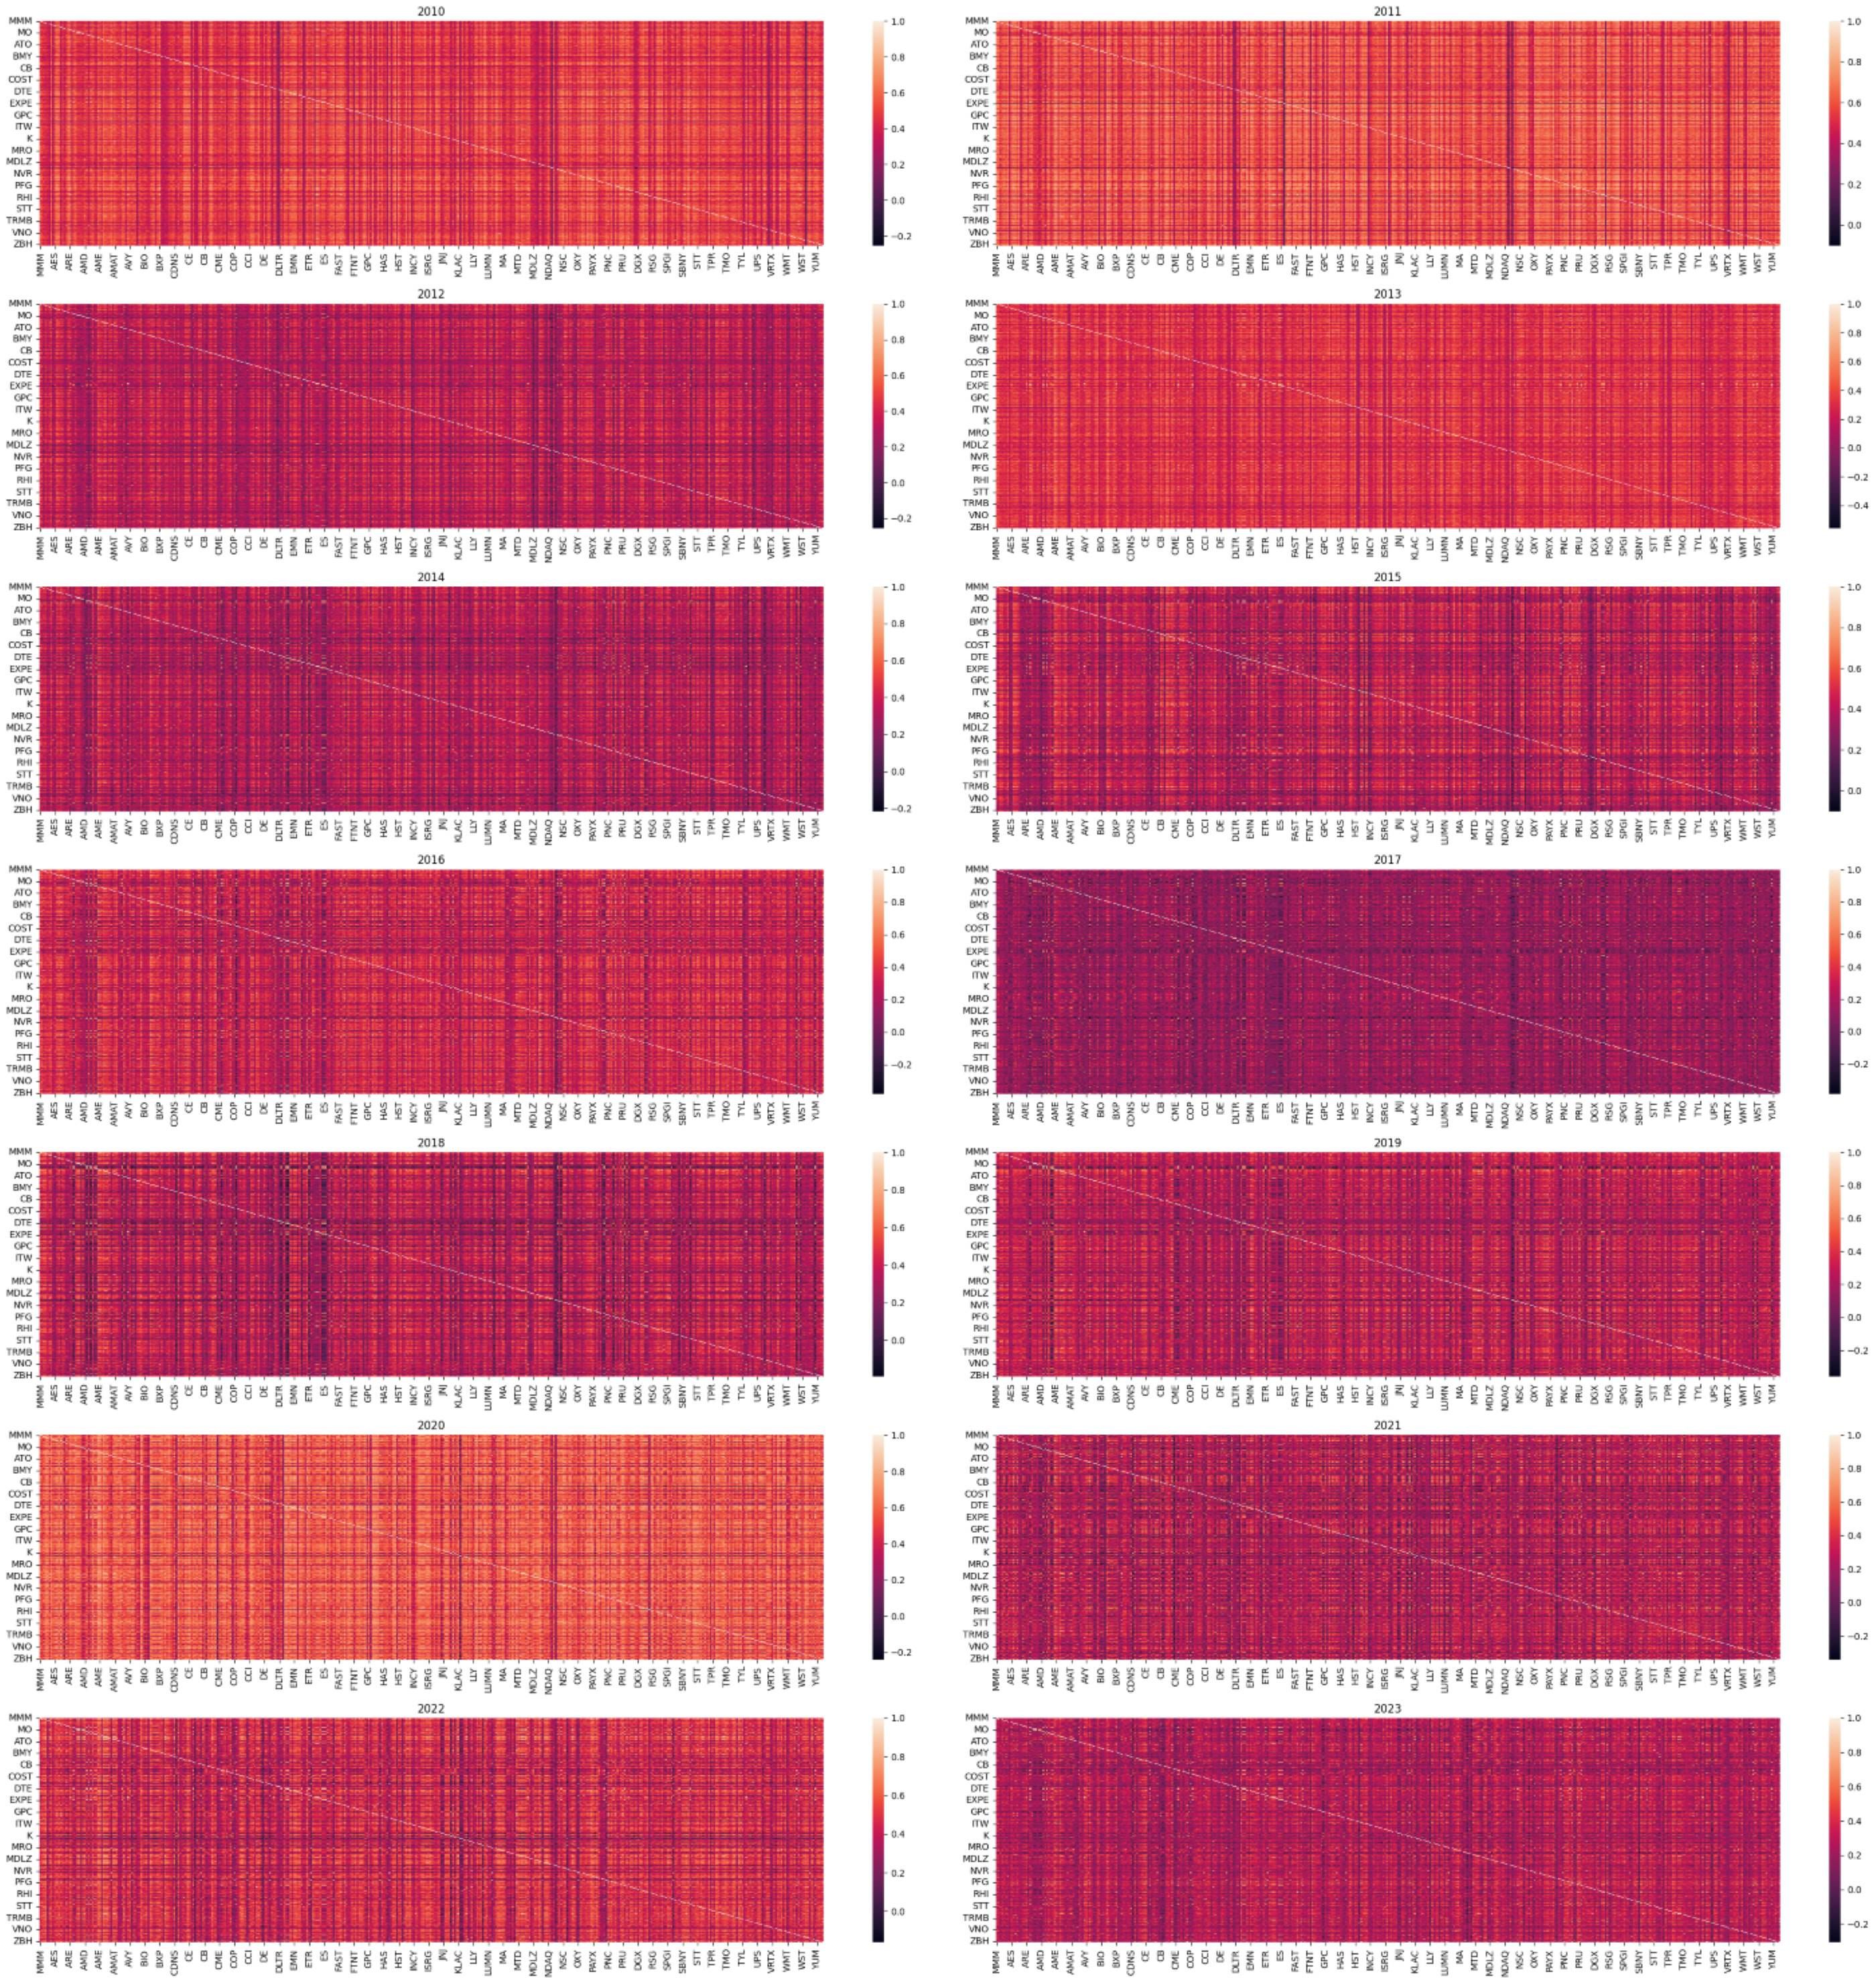

###**Observations and Insights:**

The first plot for the year 2010 and especially the second plot of 2011 shows that there is high correlation among the stocks. It shows that since in 2011 there was a market crash and there was volatility in the market, the prices of the stock went down along with the other stocks and this is the reason for high correlation.

Similarly in 2012, 2014, 2017 the market is stabilizing and hence the correlation among stocks is low.

In 2020, due to the COVID pandemic and the volatility in the market the prices of the stock went down or up along with other stocks and this is why we observe high correlation.

From this we can see that In stable market conditions correlation matrices have low correlation values whereas in critical market conditions correlation matrices have high correlation values.

# **Creating Networks**

Now based on the above observations i am going to use Networks (which sometimes in the code i will refer to them as Graph from **Graph Theory**) that will help to understand more sepecific patterns and their implications in the context of the SNP-500 market condition.

On the below approach we can visualize the relationships (correlations) between the stocks in 2010 as a graph (nodes represent stocks and edges represent correlations between them).

In [ ]:
graph_2010 = nx.Graph(return_correlation_2010)

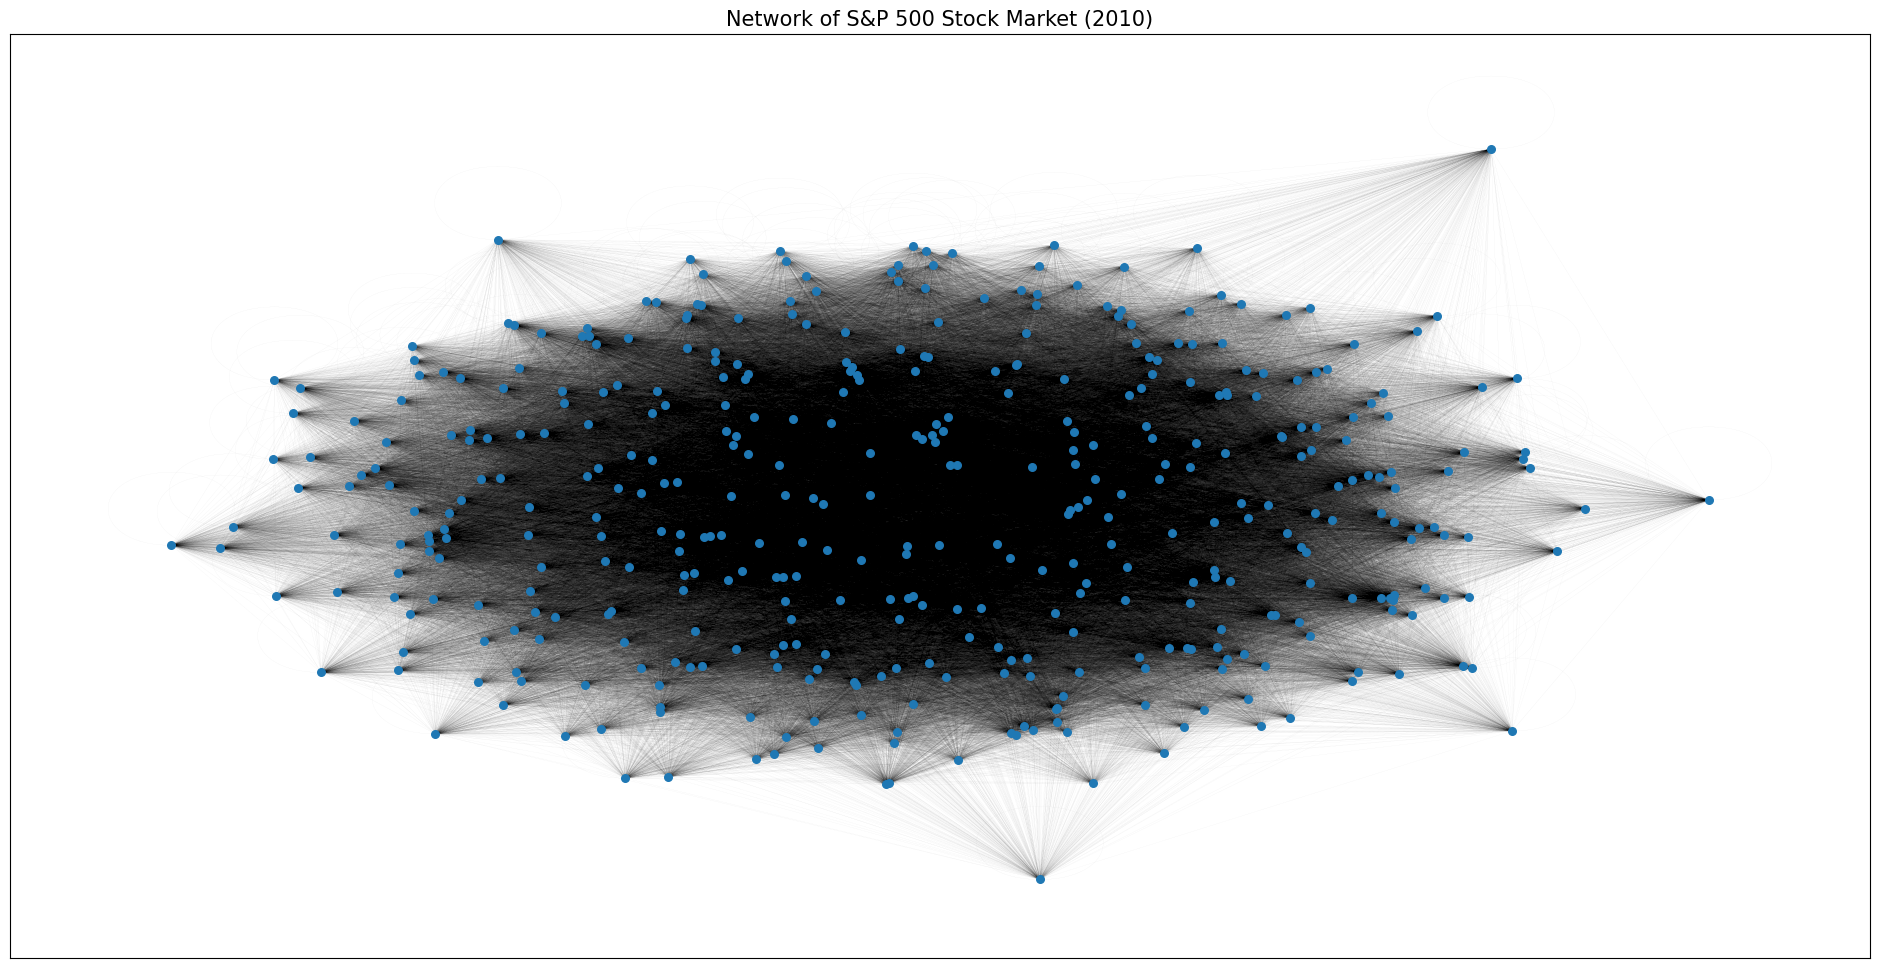

In [ ]:
#Plot the Graph
figure = plt.figure(figsize=(24, 12))
nx.draw_networkx(graph_2010, with_labels=False,node_size=30,width=0.01)
plt.title('Network of S&P 500 Stock Market (2010)', fontsize=15)
plt.show()

### **Observations:**

A fully connected network has been created through the correlation matrix. Meaning that every variable has connections with all the other variables including self-loops.
From the plot we also realise that is almost impossible to read the Network and understand what is going on.

## **Filtering Graphs**

###**MST - Minimum Spanning Tree**

The stock market is a big network where each stock is connected to every other stock creating a very complex picture.

To simplify i will use a technique called **Minimum Spanning Tree** (MST), it's like drawing a map of the market but only keeping the most important roads between stocks.
This helps focusing on the key relationships and understanding the market better.

Note:While removing redundancy and noise in the data using MST it might lose some information as well.

###**Converted the correlation coefficient into a distance**

Before the construction of the MST graph the correlation coefficient is converted into a distance.The transformation is a mathematical way to convert the correlation coefficient into a measure that behaves like a distance in Euclidean space.
$$\text{distance} = \sqrt{2\times(1 -\text{correlation})}$$


In [ ]:
# Convert the correlation coefficient
distance_2010 = np.sqrt(2 * (1 - return_correlation_2010))
distance_2011 = np.sqrt(2 * (1 - return_correlation_2011))
distance_2012 = np.sqrt(2 * (1 - return_correlation_2012))
distance_2013 = np.sqrt(2 * (1 - return_correlation_2013))
distance_2014 = np.sqrt(2 * (1 - return_correlation_2014))
distance_2015 = np.sqrt(2 * (1 - return_correlation_2015))
distance_2016 = np.sqrt(2 * (1 - return_correlation_2016))
distance_2017 = np.sqrt(2 * (1 - return_correlation_2017))
distance_2018 = np.sqrt(2 * (1 - return_correlation_2018))
distance_2019 = np.sqrt(2 * (1 - return_correlation_2019))
distance_2020 = np.sqrt(2 * (1 - return_correlation_2020))
distance_2021 = np.sqrt(2 * (1 - return_correlation_2021))
distance_2022 = np.sqrt(2 * (1 - return_correlation_2022))
distance_2023 = np.sqrt(2 * (1 - return_correlation_2023))

In [ ]:
distance_2010.head(5)

MMM       AOS       ABT       ACN       ADM      ADBE       ADP  \
MMM  0.000000  0.901683  1.015946  1.013633  1.065700  1.153542  0.804463   
AOS  0.901683  0.000000  1.095930  1.143672  1.163593  1.178351  0.972188   
ABT  1.015946  1.095930  0.000000  1.052850  1.056337  1.191308  1.004617   
ACN  1.013633  1.143672  1.052850  0.000000  1.131331  1.220346  0.961415   
ADM  1.065700  1.163593  1.056337  1.131331  0.000000  1.256732  0.993180   

          AAP       AES       AFL  ...        WY       WHR       WMB  \
MMM  1.222126  0.912571  0.792162  ...  1.314461  0.868334  0.870513   
AOS  1.192765  0.975223  0.903831  ...  1.271785  0.969575  0.939591   
ABT  1.298851  1.012364  0.967339  ...  1.325669  1.048039  1.000373   
ACN  1.278093  1.042082  0.978368  ...  1.282762  1.027600  1.044252   
ADM  1.196457  1.068909  1.010650  ...  1.370138  1.107022  1.040956   

          WTW      WYNN       XEL       YUM      ZBRA       ZBH      ZION  
MMM  0.975658  0.957215  0.901946  0.906855  0.973747  0.927566  1.014627  
AOS  1.058488  1.041572  1.031533  0.990189  0.972692  1.106123  1.043806  
ABT  1.081411  1.092534  0.937597  1.047442  1.085015  1.093735  1.080728  
ACN  1.000761  1.056228  1.066891  0.989510  1.059252  1.069464  1.100562  
ADM  1.089559  1.140173  1.019397  0.991642  1.056167  1.145328  1.176001  

[5 rows x 420 columns]

The code below transforms distance matrices into Networks representations for each year. These Networks serve as the basis for further analysis such as generating **Minimum Spanning Trees** (MST)

In [ ]:
# Transforms the distance matrices into Networks for every year
distance_2010_graph = nx.Graph(distance_2010)
distance_2011_graph = nx.Graph(distance_2011)
distance_2012_graph = nx.Graph(distance_2012)
distance_2013_graph = nx.Graph(distance_2013)
distance_2014_graph = nx.Graph(distance_2014)
distance_2015_graph = nx.Graph(distance_2015)
distance_2016_graph = nx.Graph(distance_2016)
distance_2017_graph = nx.Graph(distance_2017)
distance_2018_graph = nx.Graph(distance_2018)
distance_2019_graph = nx.Graph(distance_2019)
distance_2020_graph = nx.Graph(distance_2020)
distance_2021_graph = nx.Graph(distance_2021)
distance_2022_graph = nx.Graph(distance_2022)
distance_2023_graph = nx.Graph(distance_2023)

####Apply **MST** using the **Kruskal** Algorithm with NetworkX library:
- Sort Edges: Kruskal algorithm sorts all the edges of the graph by their weight in non-decreasing order.
- Build the MST: It then adds edges to the MST starting from the smallest edge ensuring that adding the edge does not create a cycle. This process continues until all nodes are connected forming the MST.

In [ ]:
graph_2010_filtered = nx.minimum_spanning_tree(distance_2010_graph)
graph_2011_filtered = nx.minimum_spanning_tree(distance_2011_graph)
graph_2012_filtered = nx.minimum_spanning_tree(distance_2012_graph)
graph_2013_filtered = nx.minimum_spanning_tree(distance_2013_graph)
graph_2014_filtered = nx.minimum_spanning_tree(distance_2014_graph)
graph_2015_filtered = nx.minimum_spanning_tree(distance_2015_graph)
graph_2016_filtered = nx.minimum_spanning_tree(distance_2016_graph)
graph_2017_filtered = nx.minimum_spanning_tree(distance_2017_graph)
graph_2018_filtered = nx.minimum_spanning_tree(distance_2018_graph)
graph_2019_filtered = nx.minimum_spanning_tree(distance_2019_graph)
graph_2020_filtered = nx.minimum_spanning_tree(distance_2020_graph)
graph_2021_filtered = nx.minimum_spanning_tree(distance_2021_graph)
graph_2022_filtered = nx.minimum_spanning_tree(distance_2022_graph)
graph_2023_filtered = nx.minimum_spanning_tree(distance_2023_graph)

###**Plot the MST Based Network Graph**

In [ ]:

figure, axes = plt.subplots(14, 1, figsize=(24, 120))

nx.draw_networkx(graph_2011_filtered, with_labels=False, ax=axes[1],node_size=200)
axes[1].set_title('MST Based Network Graph for 2011', fontsize=16)

nx.draw_networkx(graph_2012_filtered, with_labels=False, ax=axes[2],node_size=200)
axes[2].set_title('MST Based Network Graph for 2012', fontsize=16)

nx.draw_networkx(graph_2013_filtered, with_labels=False, ax=axes[3],node_size=200)
axes[3].set_title('MST Based Network Graph for 2013', fontsize=16)

nx.draw_networkx(graph_2014_filtered, with_labels=False, ax=axes[4],node_size=200)
axes[4].set_title('MST Based Network Graph for 2014', fontsize=16)

nx.draw_networkx(graph_2015_filtered, with_labels=False, ax=axes[5],node_size=200)
axes[5].set_title('MST Based Network Graph for 2015', fontsize=16)

nx.draw_networkx(graph_2016_filtered, with_labels=False, ax=axes[6],node_size=200)
axes[6].set_title('MST Based Network Graph for 2016', fontsize=16)

nx.draw_networkx(graph_2017_filtered, with_labels=False, ax=axes[7],node_size=200)
axes[7].set_title('MST Based Network Graph for 2017', fontsize=16)

nx.draw_networkx(graph_2018_filtered, with_labels=False, ax=axes[8],node_size=200)
axes[8].set_title('MST Based Network Graph for 2018', fontsize=16)

nx.draw_networkx(graph_2019_filtered, with_labels=False, ax=axes[9],node_size=200)
axes[9].set_title('MST Based Network Graph for 2019', fontsize=16)

nx.draw_networkx(graph_2020_filtered, with_labels=False, ax=axes[10],node_size=200)
axes[10].set_title('MST Based Network Graph for 2020', fontsize=16)

nx.draw_networkx(graph_2021_filtered, with_labels=False, ax=axes[11],node_size=200)
axes[11].set_title('MST Based Network Graph for 2021', fontsize=16)

nx.draw_networkx(graph_2022_filtered, with_labels=False, ax=axes[12],node_size=200)
axes[12].set_title('MST Based Network Graph for 2022', fontsize=16)

nx.draw_networkx(graph_2023_filtered, with_labels=False, ax=axes[13],node_size=200)
axes[13].set_title('MST Based Network Graph for 2023', fontsize=16)

plt.tight_layout()
plt.show()

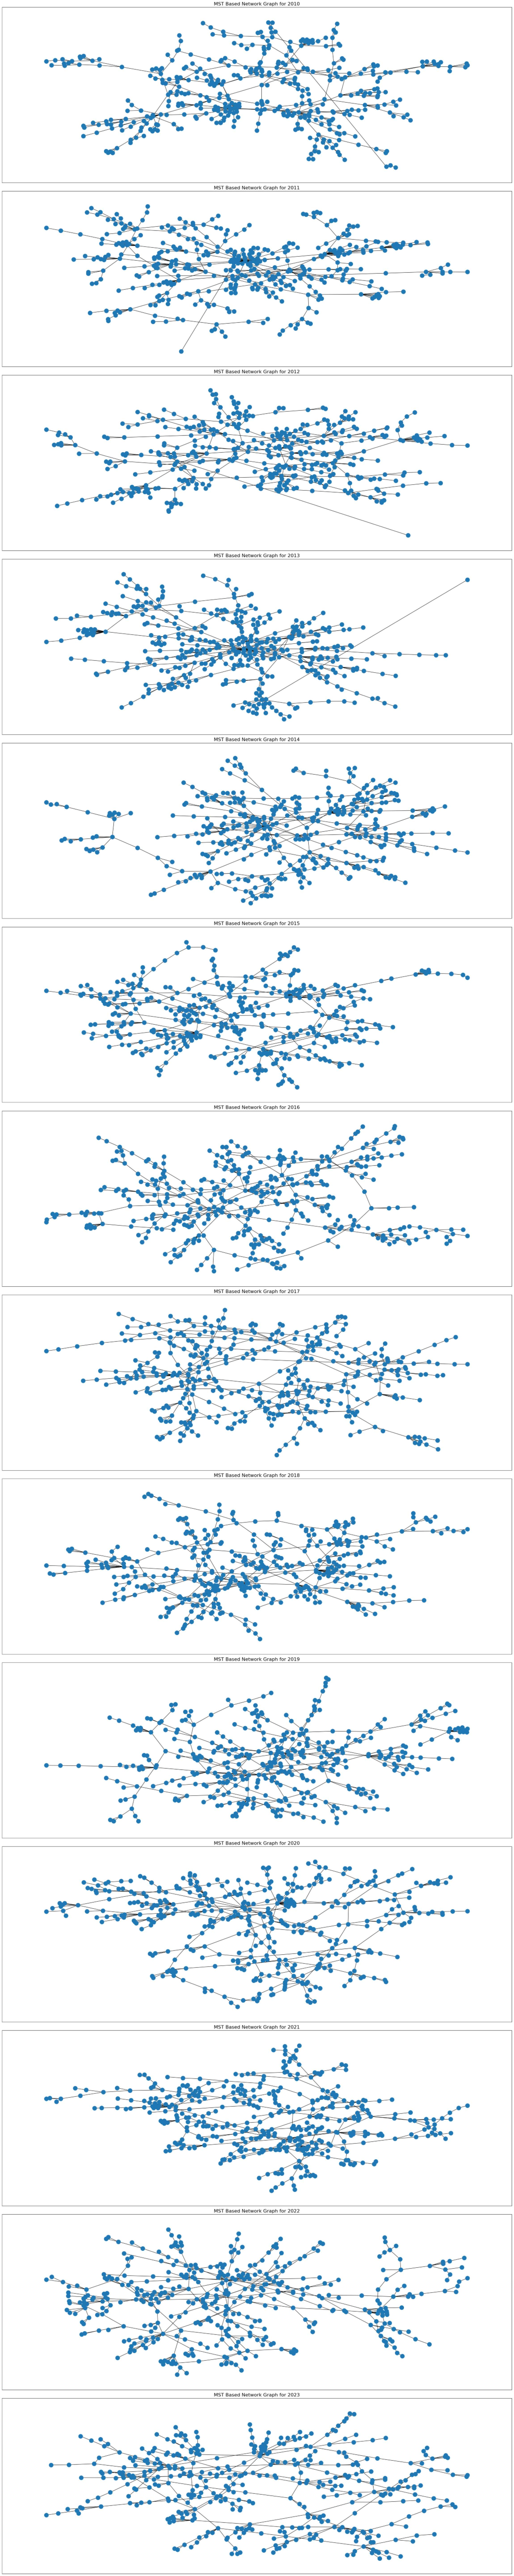

###**Observations:**

The produced MST graphs are much easier to read and there are no cycles any more.

## **Computing Graph Statistics over Time creating a line plot**
The code below will calculate the average shortest path length for the (MST) graphs and store these values in a list for further analysis.

In [ ]:
#Create empty lists
average_degree_connectivity = []
average_shortest_path_length = []
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]

# Create a loop Through Each Year’s Graph:
for graph in [graph_2010_filtered, graph_2011_filtered, graph_2012_filtered, graph_2013_filtered, graph_2014_filtered, graph_2015_filtered,
             graph_2016_filtered, graph_2017_filtered, graph_2018_filtered, graph_2019_filtered, graph_2020_filtered, graph_2021_filtered, graph_2022_filtered,graph_2023_filtered]:

    # nx.average_shortest_path_length(graph) function from the NetworkX library is used to calculate the average shortest path length
    average_shortest_path_length.append(nx.average_shortest_path_length(graph))

####**Plot the Average Shortest Path Length time line-plot**

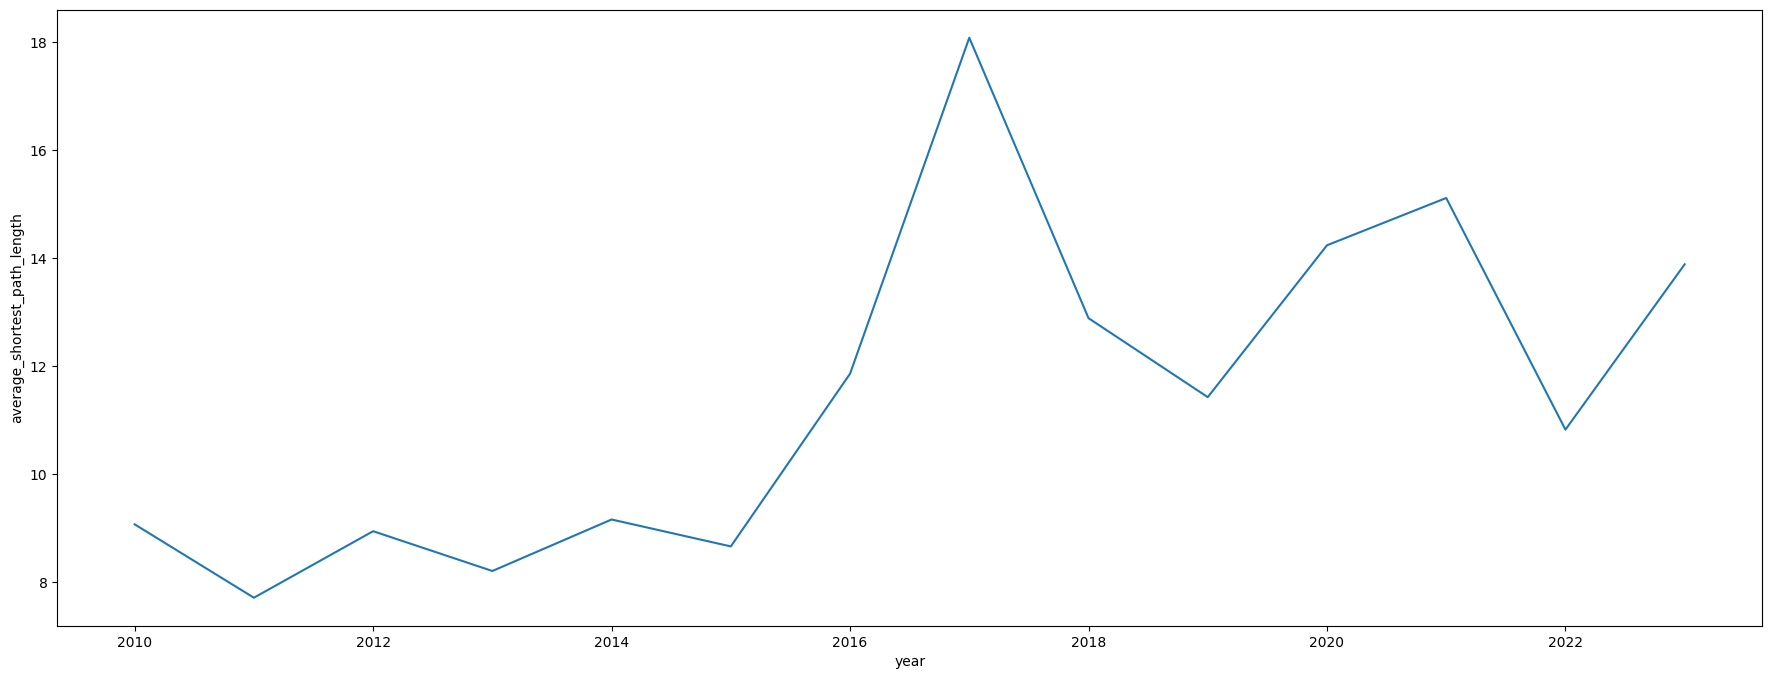

In [ ]:
# Plot the
figure = plt.figure(figsize=(22, 8))
sns.lineplot(x='year', y='average_shortest_path_length',
             data=pd.DataFrame({'year': year, 'average_shortest_path_length': average_shortest_path_length}));

From the above plot we can see that the shortest path length was more stable till 2015 but there was significant increment in 2016 and 2017 and again there was a decrement in 2018. In 2020 there an increment again that drops abruptly in 2022 and an increment again untl today. Maybe this has some correlation with financial concerns.

## **Stock Market Network Analysis and Visualization**

At the folowing notebook section i will construct and visualizing a network (or graph) based on the relationships between stocks in the stock market from 2010 to 2023.

####**Lets Calculate the log returns and compute the correlation matrix**

In [ ]:
# Calculate the log returns of the stocks over time 2010 to 2023
log_returns_2010_till_2023 = np.log(stock_data_cleaned.shift(1)) - np.log(stock_data_cleaned)
# Calculate the correlation matrix of the log returns 2010 to 2023
return_correlation_2010_till_2023 = log_returns_2010_till_2023.corr()

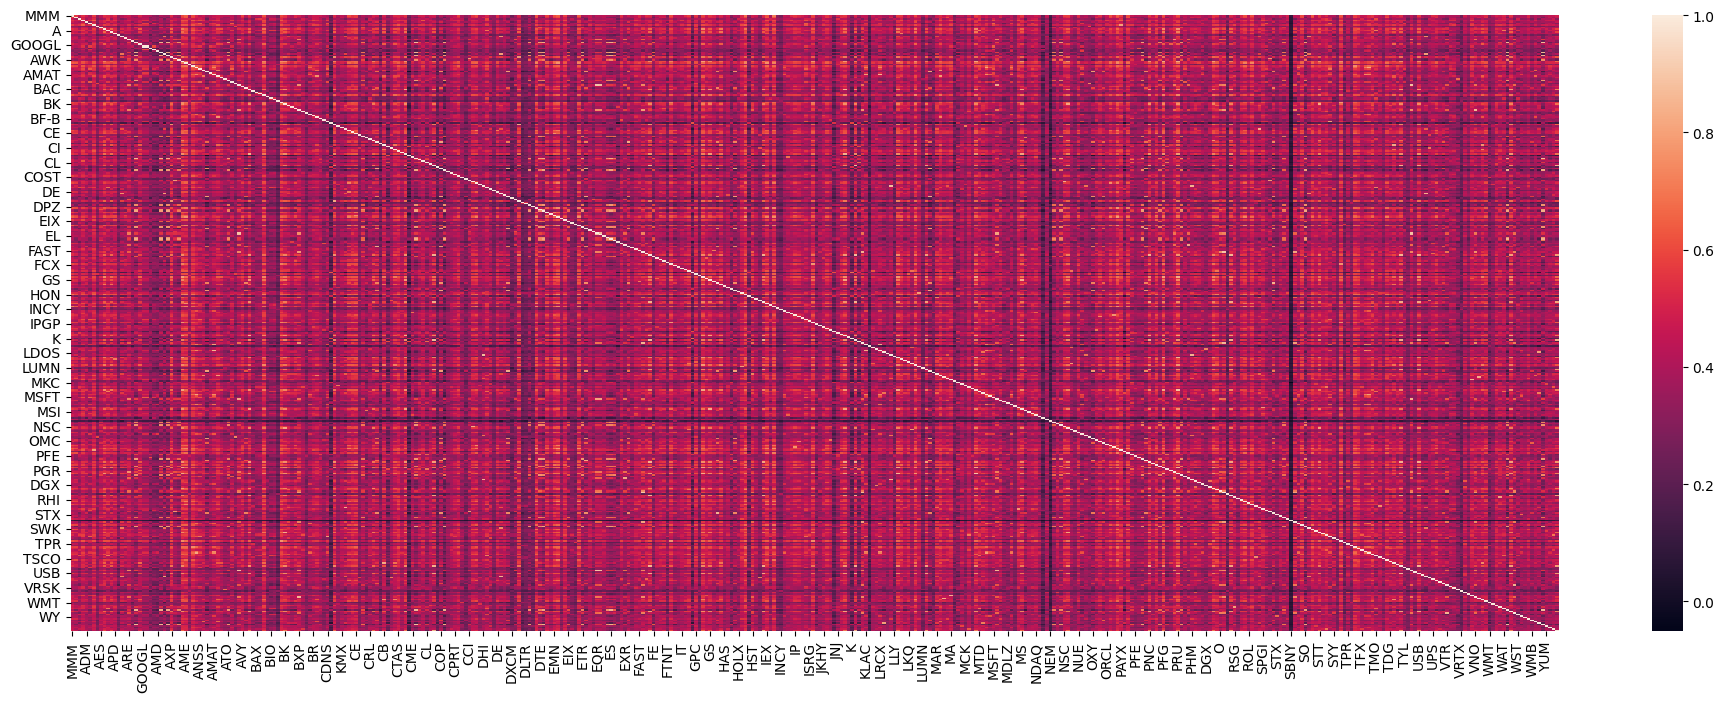

In [ ]:
# Plot the correlation matrix as heatmap
figure = plt.figure(figsize=(24, 8))
sns.heatmap(return_correlation_2010_till_2023);

####**Lets ransforms it into a distance matrix.**

In [ ]:
distance_2010_till_2023 = np.sqrt(2 * (1 - return_correlation_2010_till_2023))

####**Apply the Minimum Spanning Tree (MST)**

In [ ]:
distance_2010_till_2023_graph = nx.Graph(distance_2010_till_2023)
distance_2010_till_2023_graph_filtered = nx.minimum_spanning_tree(distance_2010_till_2023_graph)

In [ ]:
# Get the number of nodes in the graph
num_nodes = distance_2010_till_2023_graph_filtered.number_of_nodes()
print("Number of nodes:", num_nodes)

# Get the number of edges in the graph
num_edges = distance_2010_till_2023_graph_filtered.number_of_edges()
print("Number of edges:", num_edges)

# Check if the graph is connected
is_connected = nx.is_connected(distance_2010_till_2023_graph_filtered)
print("Is the graph connected?", is_connected)

Number of nodes: 420
Number of edges: 419
Is the graph connected? True


####**Plotting of the MST graph for the S&P500 stock market from 2010 to 2023**

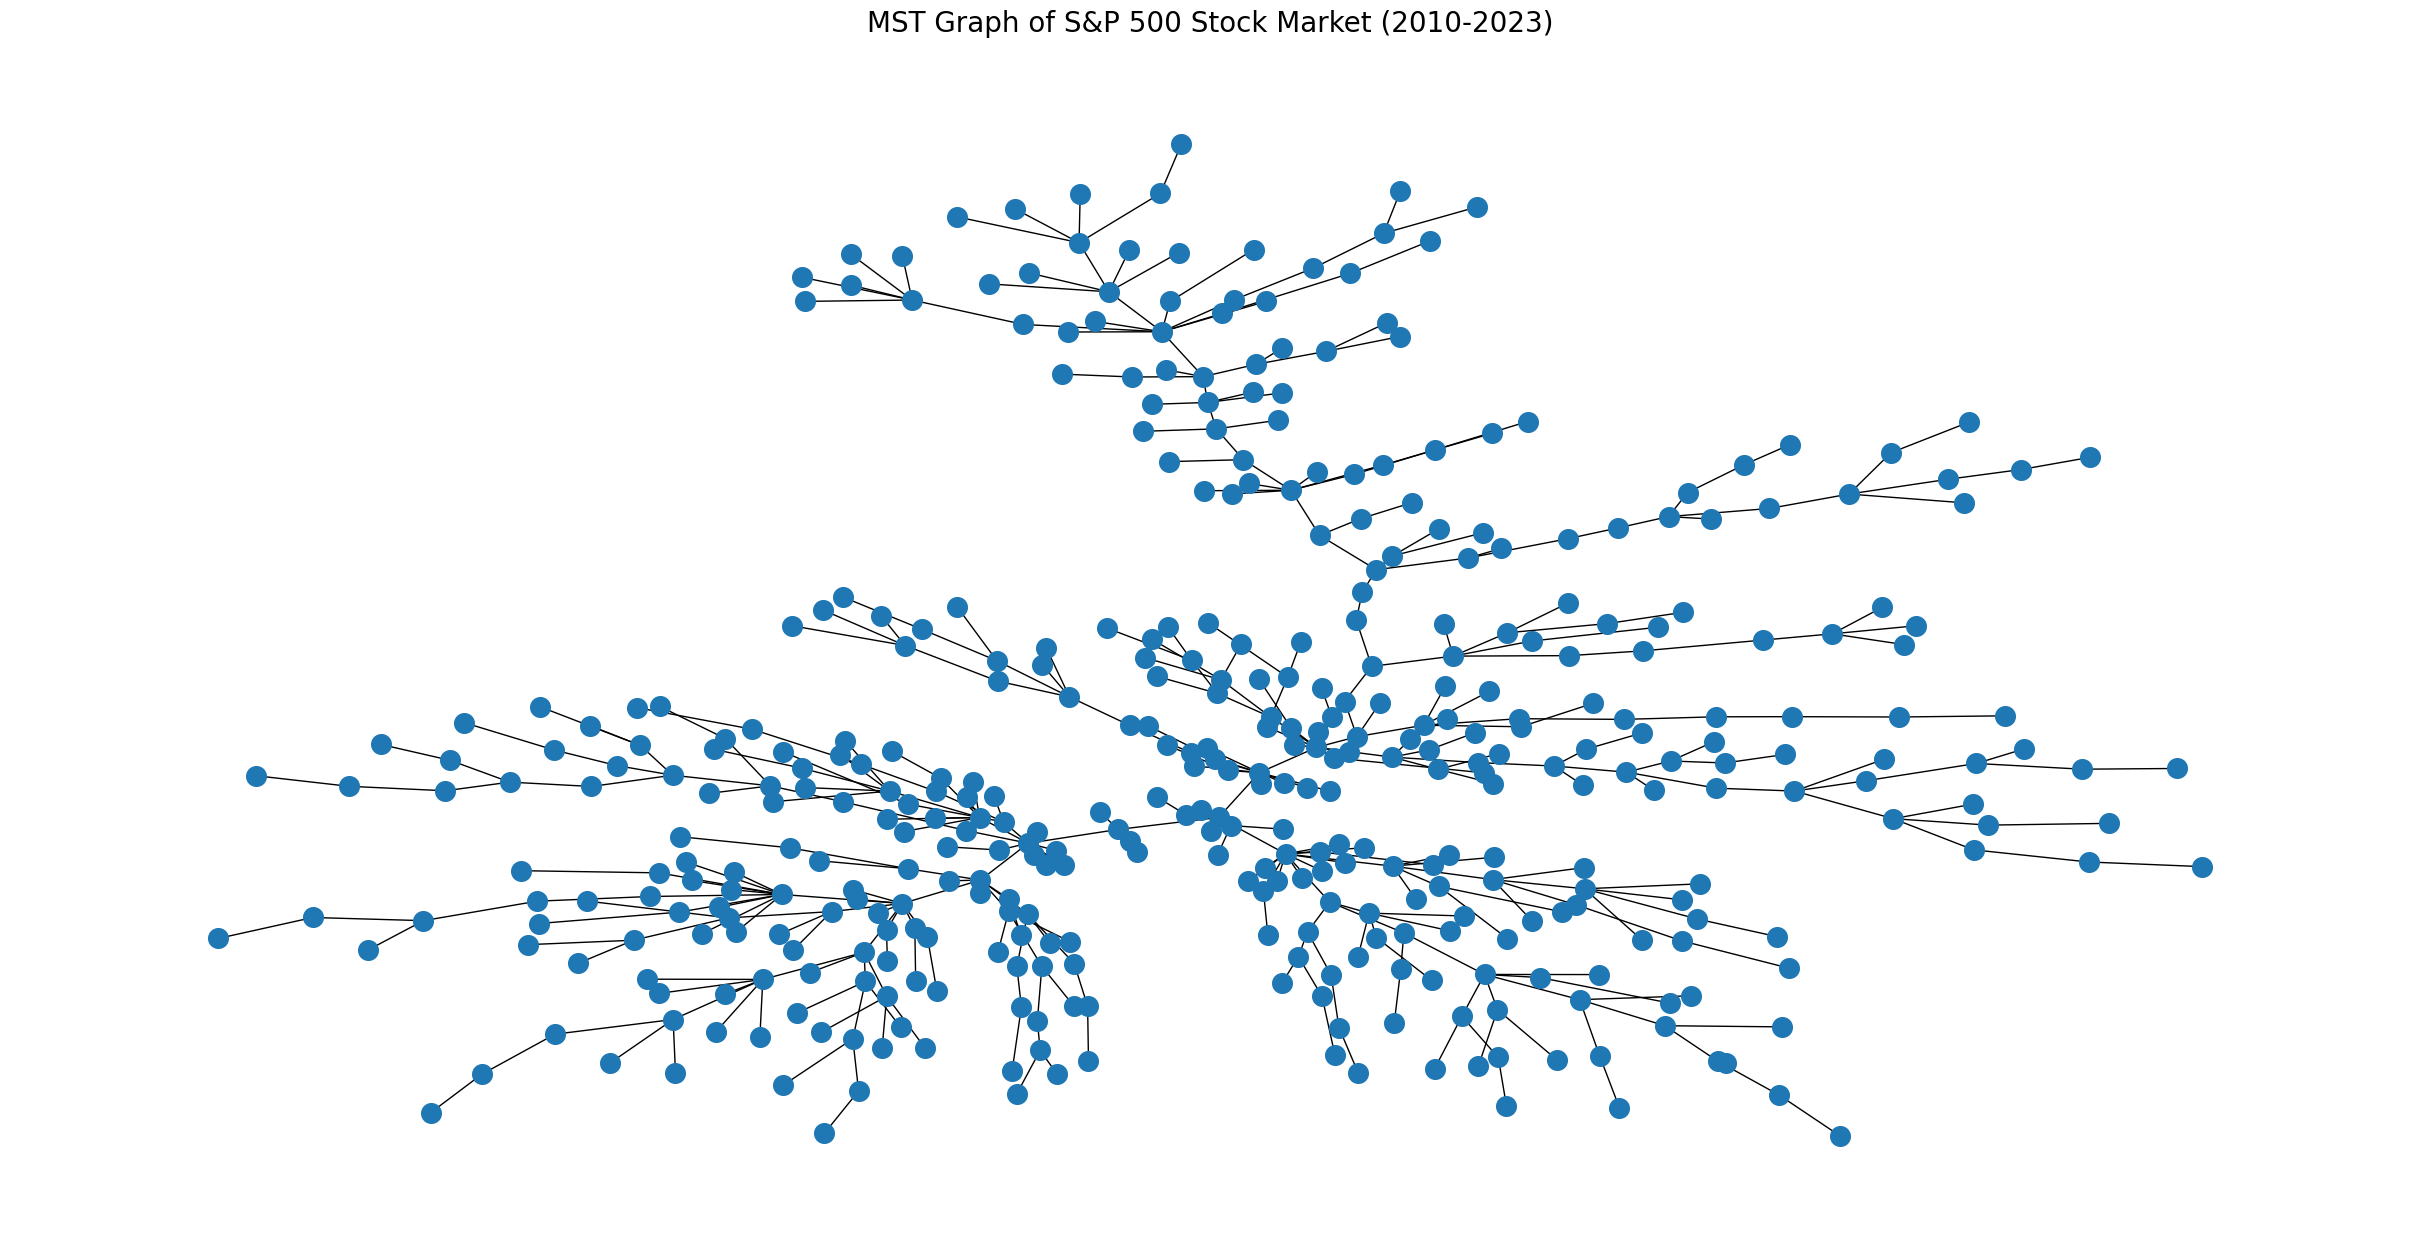

In [ ]:
figure = plt.figure(figsize=(24, 12))
# Lets visualise the plot using the nx.draw_kamada_kawai function from the NetworkX library in order to make the visualization more interpretable.
nx.draw_kamada_kawai(distance_2010_till_2023_graph_filtered, with_labels=False,node_size=200)

# Display the plot
plt.title('MST Graph of S&P 500 Stock Market (2010-2023)', fontsize=20)
plt.show()

###**Observations and Insights:**

- The graph has distinct clusters which could represent groups of stocks that are more closely related to each other.
- Areas where the nodes are spread might indicate diversification or periods where certain stocks or sectors moved independently
- The graphcould be used to find sectors that have gained importance or stocks that have become more central in recent years.

**Note:** The graph is **conected** and has **420 nodes** (stocks/companies), **419 edges**, but in the plot we perceive a part of it since it has been adjusted for visualisation purposes to the plot size (a bigger plot will potentially reveal more nodes and edges).


##**Analyzing the network's topology with Centrality Measures**

Calculating the centrality measures in the network will help to understand the importance or influence of the nodes within the graph.

###**Apply Degree centrality**
Which will help measuring the number of direct connections our nodes have since nodes with higher degree centrality are often considered more influential because they are directly connected to many other nodes.

In [ ]:
degree_centrality = nx.degree_centrality(distance_2010_till_2023_graph_filtered)

In [ ]:
# Create the Bar chart showing the Degree Centralty among stocks
keys = []
values = []

for key, value in degree_centrality.items():
    keys.append(key)
    values.append(value)

dc_data = pd.DataFrame({'stocks': keys, 'degree_centrality': values}).sort_values('degree_centrality', ascending=False)
px.bar(data_frame=dc_data, x='stocks', y='degree_centrality', template='plotly_dark')

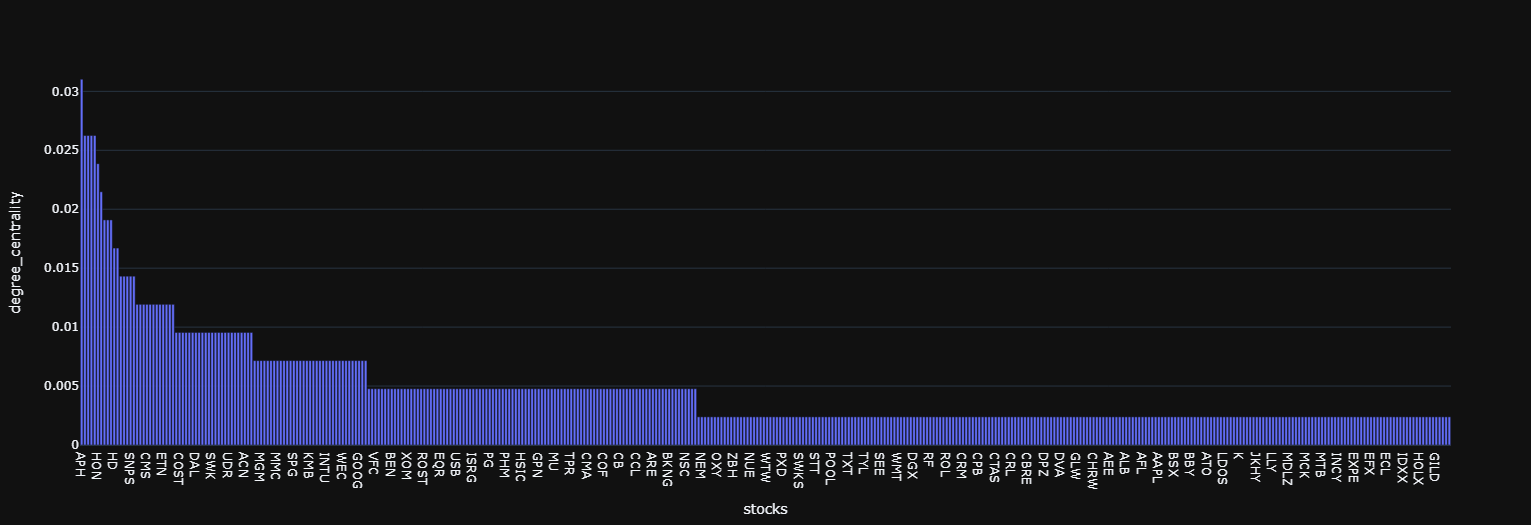

In [ ]:
from IPython.display import Image, display
# Display the image as a PNG for the HTML
display(Image(filename='newplot.png'))

###**Observations and insights:**
- From the bar chart we observe that only few stocks like (APH, PEP, GIS) have a much higher degree centrality compared to others. These stocks are more directly connected to many other nodes (stocks) suggesting they are more influential in the network.
These high-centrality stocks could be key players in the market potentially representing major companies or sectors that influence many others.
- There's a sharp decline in degree centrality after the top few stocks with many stocks having relatively low centrality indicating that the network is heavily influenced by a few key players.

###**Apply Closeness centrality**
Which will help to measure how close a node is to all other nodes in the graph since nodes with high closeness centrality can quickly interact with all other nodes in the network making them efficient in passing information.

In [ ]:
closeness_centrality = nx.closeness_centrality(distance_2010_till_2023_graph_filtered)

In [ ]:
keys = []
values = []

for key, value in closeness_centrality.items():
    keys.append(key)
    values.append(value)

cc_data = pd.DataFrame({'stocks': keys, 'closeness_centrality': values}).sort_values('closeness_centrality',
                                                                                       ascending=False)
px.bar(data_frame=cc_data, x='stocks', y='closeness_centrality', template='plotly_dark')

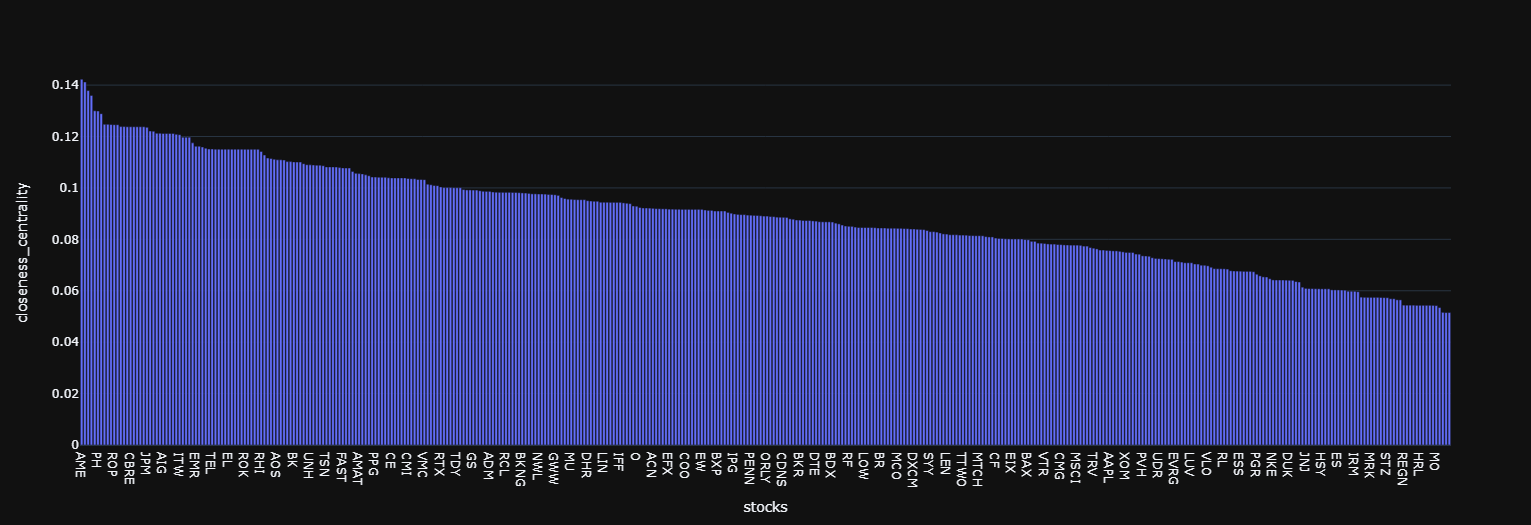

In [ ]:
from IPython.display import Image, display
# Display the image as a PNG for the HTML
display(Image(filename='newplot (1).png'))

###**Observations and insights:**
- From the bar chart the Stocks like (XOM, AAPL, APPL) have high closeness centrality meaning they can influence a large part of the market.
- As you move across the chart even if some stocks dominate, many others still have a moderate influence showing a balanced market.
- Stocks with high closeness centrality can quickly spread or receive market information making them key players in reacting to market news or trends.

###**Apply Betweenness centrality**
Which helps measuring how often a stock (node) appears on the shortest paths between other stocks in a market network. It shows how much control a stock has over the flow of information in the market.


In [ ]:
betweenness_centrality = nx.betweenness_centrality(distance_2010_till_2023_graph_filtered)

In [ ]:
keys = []
values = []

for key, value in betweenness_centrality.items():
    keys.append(key)
    values.append(value)

bc_data = pd.DataFrame({'stocks': keys, 'betweenness_centrality': values}).sort_values('betweenness_centrality',
                                                                                       ascending=False)
px.bar(data_frame=bc_data, x='stocks', y='betweenness_centrality', template='plotly_dark')

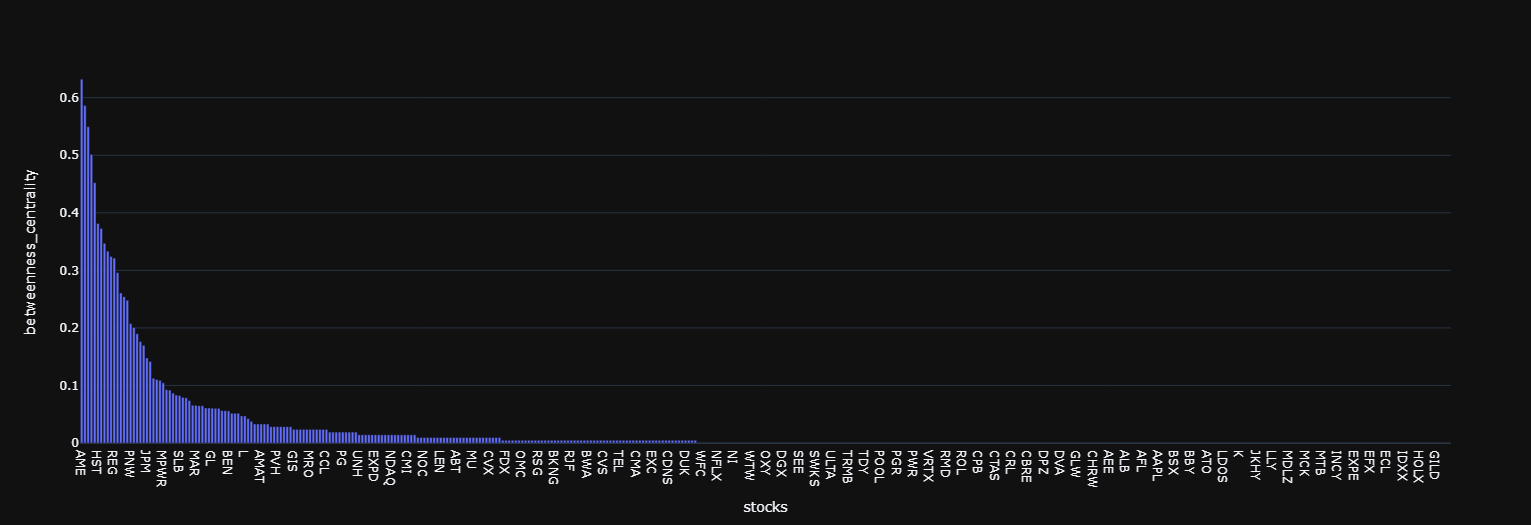

In [ ]:
from IPython.display import Image, display
# Display the image as a PNG for the HTML
display(Image(filename='newplot (2).png'))

###**Observations and insights:**
- A few stocks like AME, HST, and REG are important because they connect different parts of the market, making them key players in how information and transactions flow.
- After the top stocks there's a big drop in betweenness centrality. This means only a few stocks are central to the market while most others aren't as connected.
- Most stocks have low betweenness centrality meaning they don't connect different parts of the market and might operate more on their own.
- The market depends on a few key stocks to stay connected. Which could be important for an investors to watch.
- The market could be vulnerable if these key stocks face issues.

###**Apply Eigenvector centrality**
In networks as in finance not all connections are equal. A connection to a highly influential node(stock) is more valuable than a connection to a less influential one. Eigenvector centrality captures this nuance by assigning higher centrality scores to nodes(stocks) that are connected to other nodes(stocks)with high centrality scores.

In [ ]:
eigenvector_centrality=nx.eigenvector_centrality_numpy(distance_2010_till_2023_graph_filtered)

In [ ]:
keys = []
values = []

for key, value in eigenvector_centrality.items():
    keys.append(key)
    values.append(value)

bc_data = pd.DataFrame({'stocks': keys, 'eigenvector_centrality': values}).sort_values('eigenvector_centrality',ascending=False)
px.bar(data_frame=bc_data, x='stocks', y='eigenvector_centrality', template='plotly_dark')

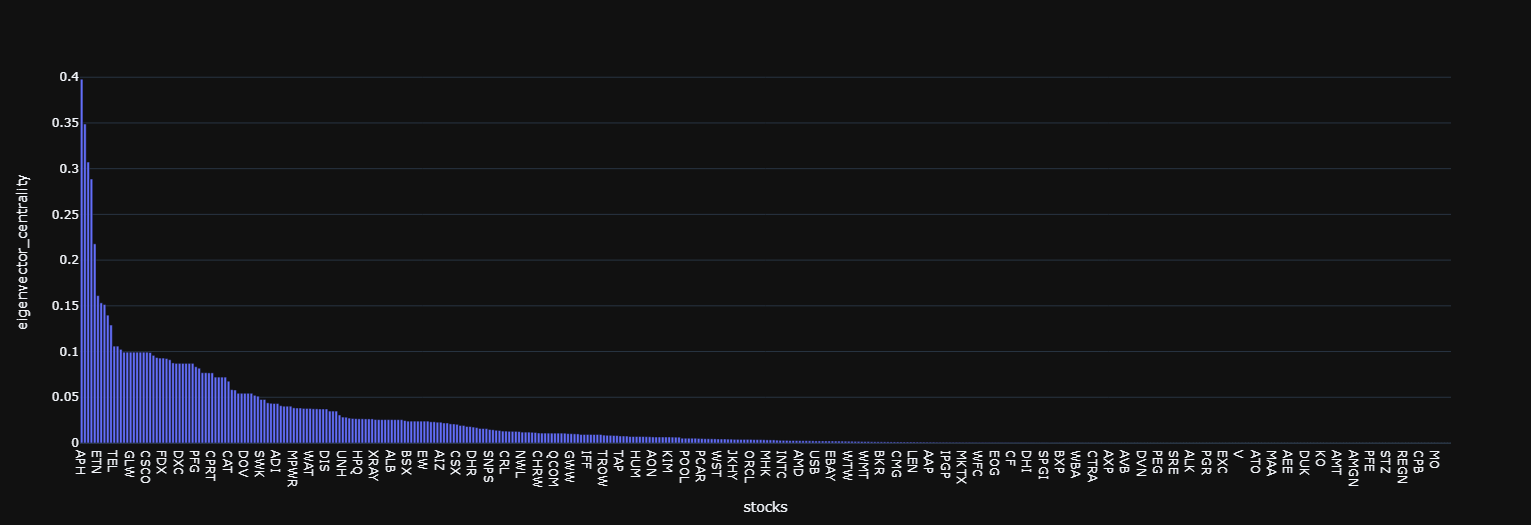

In [ ]:
from IPython.display import Image, display
# Display the image as a PNG for the HTML
display(Image(filename='/content/drive/newplot (3).png'))

###**Observations and insights:**
- The eigenvector centrality analysis reveals that a few key stocks dominate the market's structure and influence. These stocks have an important role in  market's behavior making them important to monitor for informed investment decisions and risk management.

###**Conclusion:**
So far the centrality analysis across various metrics (degree, closeness, betweenness, and eigenvector centrality) reveals that a small number of key stocks dominate the market network's structure and influence. These stocks are crucial in connecting different market segments, spreading information efficiently, and maintaining overall market stability.

##**Centrality and Distance-Based Analysis of the Network**
The following process will rank the stocks based on their importance in the network by measuring different distances between them and combining these with the previous calulated centrality measures to create a single score for each stock.

##**Distance-Based Criteria**

###**Distance on Degree Criterion**
Calculate the shortest path from each stock (node) to the stock with the highest degree centrality.

In [ ]:
# Distance on Degree Criterion

# Initialize dictionary to store shortest path lengths to the node with the highest degree centrality
distance_degree_criteria = {}

# Identify the node with the largest degree centrality (most connections)
node_with_largest_degree_centrality = max(dict(degree_centrality), key=dict(degree_centrality).get)

# Calculate and store the shortest path length from each node to the node with the largest degree centrality
for node in distance_2010_till_2023_graph_filtered.nodes():
    distance_degree_criteria[node] = nx.shortest_path_length(distance_2010_till_2023_graph_filtered, node, node_with_largest_degree_centrality)

###**Distance on Correlation Criterion**
Calculate the shortest path from each stock to the stock that has the strongest overall correlation with its neighboring stocks, and then measure how closely each other stock is connected to this highly correlated stock.

In [ ]:
# Distance on Correlation Criterion

# Initialize dictionaries to store shortest path lengths and sum of correlations
distance_correlation_criteria = {}
sum_correlation = {}

# Calculate the sum of correlations for each node with its neighbors
for node in distance_2010_till_2023_graph_filtered.nodes():
    neighbors = nx.neighbors(distance_2010_till_2023_graph_filtered, node)
    sum_correlation[node] = sum(return_correlation_2010_till_2023.loc[node, neighbor] for neighbor in neighbors)

# Identify the node with the highest sum of correlations with its neighbors
node_with_highest_correlation = max(sum_correlation, key=sum_correlation.get)

# Calculate and store the shortest path length from each node to the node with the highest correlation
for node in distance_2010_till_2023_graph_filtered.nodes():
    distance_correlation_criteria[node] = nx.shortest_path_length(distance_2010_till_2023_graph_filtered, node, node_with_highest_correlation)

###**Distance on Distance Criterion**
Calculate the shortest path from each stock to the stock with the minimum mean distance to all other nodes.

In [ ]:
# Distance on Distance Criterion

# Initialize dictionaries to store shortest path lengths and mean distances
distance_distance_criteria = {}
mean_distance = {}

# Calculate the mean shortest path distance from each node to all other nodes
for node in distance_2010_till_2023_graph_filtered.nodes():
    nodes = list(distance_2010_till_2023_graph_filtered.nodes())
    nodes.remove(node)
    distance_distance = [nx.shortest_path_length(distance_2010_till_2023_graph_filtered, node, ns) for ns in nodes]
    mean_distance[node] = np.mean(distance_distance)

# Identify the node with the minimum mean distance to all other nodes
node_with_minimum_mean_distance = min(mean_distance, key=mean_distance.get)

# Calculate and store the shortest path length from each node to the node with the minimum mean distance
for node in distance_2010_till_2023_graph_filtered.nodes():
    distance_distance_criteria[node] = nx.shortest_path_length(distance_2010_till_2023_graph_filtered, node, node_with_minimum_mean_distance)

###**Store the Results in a DataFrame**

In [ ]:
# Store the results in a DataFrame

# Create a DataFrame from the degree centrality dictionary
node_stats = pd.DataFrame.from_dict(dict(degree_centrality), orient='index')

# Add betweenness centrality to the DataFrame
node_stats.columns = ['degree_centrality']

# Add the distance criteria results to the DataFrame
node_stats['betweenness_centrality'] = pd.Series(betweenness_centrality)
node_stats['distance_degree_criteria'] = pd.Series(distance_degree_criteria)
node_stats['distance_correlation_criteria'] = pd.Series(distance_correlation_criteria)
node_stats['distance_distance_criteria'] = pd.Series(distance_distance_criteria)

# Calculate the average of the distance criteria and store it in the DataFrame
node_stats['average_distance'] = (
    node_stats['distance_degree_criteria'] + node_stats['distance_correlation_criteria'] + node_stats['distance_distance_criteria']) / 3

###**Add Closeness and Eigenvector Centrality to the DataFrame**
This will allow further analysis of the network helping to identify not only the most connected(Closeness) but also the most influential(Eigenvector) stocks in the network.

In [ ]:
# Add closeness centrality and eigenvector centrality to the DataFrame
node_stats['closeness_centrality'] = pd.Series(closeness_centrality)
node_stats['eigenvector_centrality'] = pd.Series(eigenvector_centrality) # Add this line to include eigenvector centrality

###**Normalize and combine centrality scores**
- Normalize each centrality measure by subtracting the minimum value and divide by the range (max - min) to a scale between 0 and 1 for consistent comparison.
- Combine the normalized centrality measures into a single combined score by averaging their results to get a unified centrality score for each node.

In [ ]:
# Centrality Normalization

# Normalize degree centrality
node_stats['degree_centrality_norm'] = (
    node_stats['degree_centrality'] - node_stats['degree_centrality'].min()) / (node_stats['degree_centrality'].max() - node_stats['degree_centrality'].min())

# Normalize closeness centrality
node_stats['closeness_centrality_norm'] = (
    node_stats['closeness_centrality'] - node_stats['closeness_centrality'].min()) / (node_stats['closeness_centrality'].max() - node_stats['closeness_centrality'].min())

# Normalize betweenness centrality
node_stats['betweenness_centrality_norm'] = (
    node_stats['betweenness_centrality'] - node_stats['betweenness_centrality'].min()) / (node_stats['betweenness_centrality'].max() - node_stats['betweenness_centrality'].min())

# Normalize eigenvector centrality
node_stats['eigenvector_centrality_norm'] = (
    node_stats['eigenvector_centrality'] - node_stats['eigenvector_centrality'].min()) / (node_stats['eigenvector_centrality'].max() - node_stats['eigenvector_centrality'].min())

# Combined Centrality Score

# Calculate the combined centrality score as the average of all normalized centralities
node_stats['combined_centrality'] = (node_stats['degree_centrality_norm'] +
                                      node_stats['closeness_centrality_norm'] +
                                      node_stats['betweenness_centrality_norm'] +
                                      node_stats['eigenvector_centrality_norm']) / 4


###**Weighted Scoring and Ranking of Stocks using Centrality and Distance-Based Metrics**
This code below will create a final score for each stock by combining centrality and distance giving 70% weight to centrality and 30% to distance. Then it sorts the stocks from highest to lowest based on this final score.

In [ ]:
# Final Combined Score (Weighted)
final_weighted_score = 0.7 * node_stats['combined_centrality'] + 0.3 * (1 / node_stats['average_distance'])
node_stats['final_score'] = final_weighted_score

# Sort based on the final score
node_stats_sorted = node_stats.sort_values(by='final_score', ascending=False)

Lets select the 15 most central stocks and the 15 most peripheral stocks based on their final scores.

In [ ]:
# Select the top 15 central stocks
central_stocks = node_stats_sorted.head(15)
central_portfolio = [stock for stock in central_stocks.index.values]

# Select the last 15 peripheral stocks
peripheral_stocks = node_stats_sorted.tail(15)
peripheral_portfolio = [stock for stock in peripheral_stocks.index.values]

###**Network Visualization of Central and Peripheral Stocks (2010-2023)**

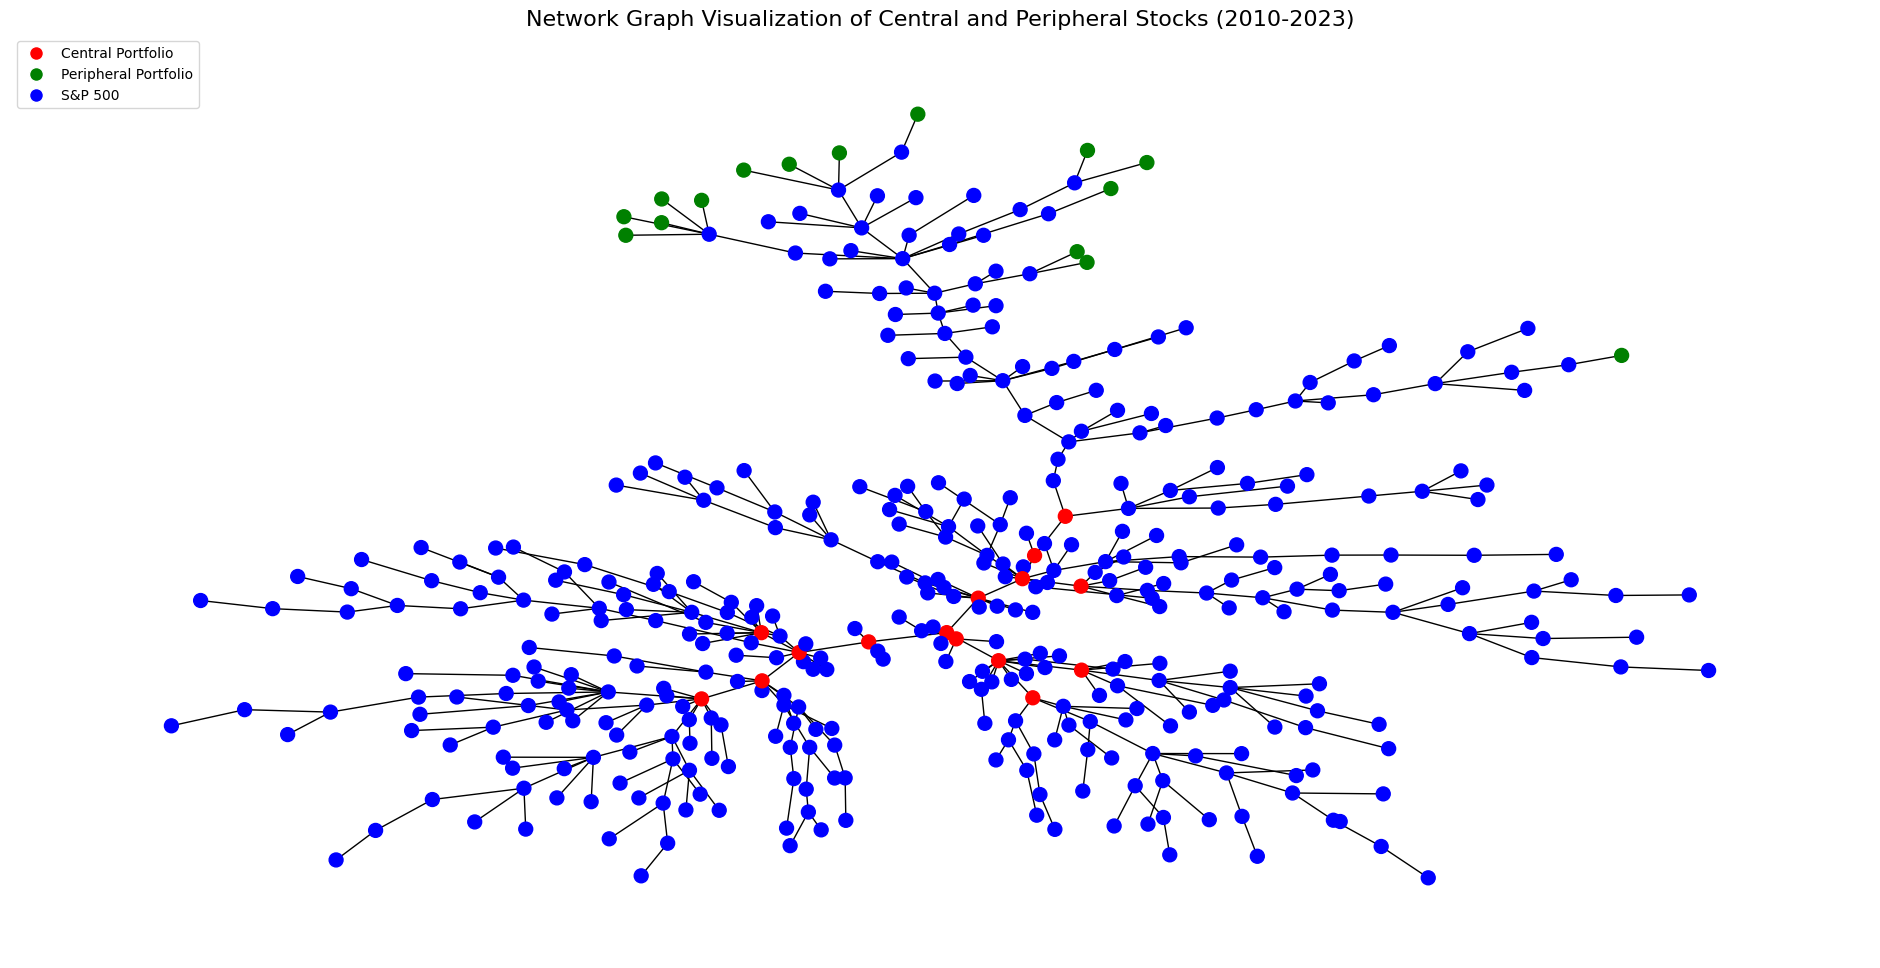

In [ ]:
color = []

for node in distance_2010_till_2023_graph_filtered:
    if node in central_portfolio:
        color.append('red')

    elif node in peripheral_portfolio:
        color.append('green')

    else:
        color.append('blue')

# Plot the graph using the Kamada-Kawai layout
figure, ax = plt.subplots(figsize=(24, 12))
nx.draw_kamada_kawai(distance_2010_till_2023_graph_filtered, with_labels=False, node_color=color, ax=ax,node_size=100)

# Create a legend directly
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Central Portfolio'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Peripheral Portfolio'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='S&P 500')],
          loc='upper left')

# Add a title to the plot
ax.set_title('Network Graph Visualization of Central and Peripheral Stocks (2010-2023)', fontsize=16)

# Display the plot
plt.show()

###**Observations:**
- Central Positioning of Central Portfolio Stocks (Red Nodes): These stocks are centrally located in the network, indicating high connectivity and influence within the market.
- Peripheral Positioning of Peripheral Portfolio Stocks (Green Nodes): These stocks are more spread out and less connected, suggesting lower influence and a potential for diversification.
- Broader S&P 500 Network (Blue Nodes): The blue nodes represent the rest of the S&P 500, forming a broad network that surrounds the central stocks, showing a wide range of connectivity levels across the market.
- Visual Hierarchy: The graph clearly distinguishes between central and peripheral stocks, emphasizing the structural importance of the central stocks in the market network.


---
##**Now lets simulate the performance of our Central and Peripheral portfolios against new historical data of the year 2024 for the S&P 500.**
---

###**Upload the historic data of S&P500 Stocks from 02-01-2024 till 22-08-2024**

In [ ]:
#Reading data for 2024 S&P 500 stocks:
stock_data_2024 = pd.read_csv('/content/drive/SP500_price_data_2024_till_August.csv', index_col=[0])


###**Visualise the Data**

In [ ]:
stock_data_2024

MMM        AOS         ABT        ABBV  ABMD         ACN  \
Date                                                                          
2024-01-02   91.973244  81.440002  109.849998  159.820007   NaN  346.920013   
2024-01-03   90.125420  78.709999  109.519997  160.460007   NaN  337.920013   
2024-01-04   90.443146  79.379997  110.980003  161.460007   NaN  337.089996   
2024-01-05   90.794312  79.040001  110.800003  162.139999   NaN  336.619995   
2024-01-08   91.020065  79.269997  112.400002  161.429993   NaN  340.350006   
...                ...        ...         ...         ...   ...         ...   
2024-08-16  127.050003  79.650002  111.000000  193.899994   NaN  326.920013   
2024-08-19  127.080002  80.699997  111.900002  196.869995   NaN  329.440002   
2024-08-20  127.699997  80.800003  110.769997  196.149994   NaN  330.369995   
2024-08-21  129.229996  81.879997  111.389999  196.529999   NaN  333.600006   
2024-08-22  128.600006  81.129997  112.099998  196.369995   NaN  330.570007   

            ATVI        ADM        ADBE         ADP  ...       WYNN  \
Date                                                 ...              
2024-01-02   NaN  72.760002  580.070007  233.419998  ...  94.599998   
2024-01-03   NaN  73.129997  571.789978  232.509995  ...  94.029999   
2024-01-04   NaN  71.750000  567.049988  233.660004  ...  94.209999   
2024-01-05   NaN  70.809998  564.599976  235.210007  ...  95.650002   
2024-01-08   NaN  71.059998  580.549988  236.759995  ...  97.050003   
...          ...        ...         ...         ...  ...        ...   
2024-08-16   NaN  59.090000  553.460022  264.089996  ...  76.290001   
2024-08-19   NaN  59.680000  563.119995  264.649994  ...  76.599998   
2024-08-20   NaN  59.009998  562.250000  264.540009  ...  76.019997   
2024-08-21   NaN  59.220001  565.789978  267.850006  ...  77.360001   
2024-08-22   NaN  59.250000  557.440002  269.380005  ...  77.089996   

                  XEL         XYL         YUM        ZBRA         ZBH  \
Date                                                                    
2024-01-02  63.470001  113.669998  129.029999  267.980011  121.389999   
2024-01-03  63.580002  111.559998  129.100006  252.520004  120.470001   
2024-01-04  63.730000  112.330002  128.690002  252.970001  120.199997   
2024-01-05  63.730000  112.150002  128.339996  252.690002  119.980003   
2024-01-08  63.580002  112.849998  128.639999  261.089996  121.970001   
...               ...         ...         ...         ...         ...   
2024-08-16  59.980000  132.800003  137.399994  344.140015  110.650002   
2024-08-19  60.150002  134.380005  136.690002  347.019989  111.769997   
2024-08-20  59.990002  134.149994  136.949997  344.850006  111.639999   
2024-08-21  59.959999  135.800003  137.750000  345.000000  112.129997   
2024-08-22  59.919998  135.419998  136.759995  342.160004  113.419998   

                 ZION         ZTS         CEG        OGN  
Date                                                      
2024-01-02  44.139999  196.570007  115.250000  14.710000  
2024-01-03  42.000000  192.929993  115.849998  14.630000  
2024-01-04  42.639999  194.039993  115.360001  13.780000  
2024-01-05  44.049999  194.850006  116.239998  14.410000  
2024-01-08  44.540001  196.149994  117.029999  16.299999  
...               ...         ...         ...        ...  
2024-08-16  46.590000  183.710007  189.979996  20.350000  
2024-08-19  47.000000  184.479996  192.779999  20.959999  
2024-08-20  46.360001  183.600006  190.720001  20.799999  
2024-08-21  47.070000  182.899994  196.740005  21.030001  
2024-08-22  47.680000  182.169998  194.949997  20.889999  

[162 rows x 504 columns]

###**Fetching S&P 500 Index Data**
The data for the S&P 500 index is fetched from the Federal Reserve Economic Data (FRED)

In [ ]:
# Get the S&P500 historical data for the year 2024 from pandas_datareader
snp_500_2024 = web.DataReader(['sp500'], 'fred', start='2024-01-01', end='2024-08-22')
snp_500_2024

sp500
DATE               
2024-01-01      NaN
2024-01-02  4742.83
2024-01-03  4704.81
2024-01-04  4688.68
2024-01-05  4697.24
...             ...
2024-08-16  5554.25
2024-08-19  5608.25
2024-08-20  5597.12
2024-08-21  5620.85
2024-08-22  5570.64

[169 rows x 1 columns]

###**Observations:**
- Column Date: The index provides daily data points with each row corresponding to a specific trading day.
- Column sp 500: The numbers (4742.83, 4704.81, etc.) represent the level of the S&P 500 index at the close of trading on that particular day. These values indicate the aggregated performance of all 500 companies included in the index.

Note: The NaN (Not a Number) on 2024-01-01 indicates that the stock market was closed on that day (possibly due to a holiday) so no trading took place and no closing value is available.

###**Data Cleaning and Alignment**
Proceeding with data alignment to  align and merg our two datasets.

In [ ]:
# Drop columns with any NA values
stock_data_2024 = stock_data_2024.dropna(axis=1)
snp_500_2024 = snp_500_2024.dropna()

# Convert indices to datetime to ensuring proper alignment by date
stock_data_2024.index = pd.to_datetime(stock_data_2024.index)
snp_500_2024.index = pd.to_datetime(snp_500_2024.index)

# Find common dates between the stock data and the S&P 500 data
common_dates = stock_data_2024.index.intersection(snp_500_2024.index)

# Select from both dataframes to include only the common dates
stock_data_2024 = stock_data_2024.loc[common_dates]
snp_500_2024 = snp_500_2024.loc[common_dates]

In [ ]:
snp_500_2024.shape

(162, 1)

In [ ]:
stock_data_2024.shape

(162, 475)

###**Visualise the Data**

In [ ]:
stock_data_2024

MMM        AOS         ABT        ABBV         ACN  \
2024-01-02   91.973244  81.440002  109.849998  159.820007  346.920013   
2024-01-03   90.125420  78.709999  109.519997  160.460007  337.920013   
2024-01-04   90.443146  79.379997  110.980003  161.460007  337.089996   
2024-01-05   90.794312  79.040001  110.800003  162.139999  336.619995   
2024-01-08   91.020065  79.269997  112.400002  161.429993  340.350006   
...                ...        ...         ...         ...         ...   
2024-08-16  127.050003  79.650002  111.000000  193.899994  326.920013   
2024-08-19  127.080002  80.699997  111.900002  196.869995  329.440002   
2024-08-20  127.699997  80.800003  110.769997  196.149994  330.369995   
2024-08-21  129.229996  81.879997  111.389999  196.529999  333.600006   
2024-08-22  128.600006  81.129997  112.099998  196.369995  330.570007   

                  ADM        ADBE         ADP        AAP        AES  ...  \
2024-01-02  72.760002  580.070007  233.419998  61.950001  19.340000  ...   
2024-01-03  73.129997  571.789978  232.509995  61.000000  18.930000  ...   
2024-01-04  71.750000  567.049988  233.660004  60.490002  18.870001  ...   
2024-01-05  70.809998  564.599976  235.210007  61.520000  18.799999  ...   
2024-01-08  71.059998  580.549988  236.759995  61.910000  19.070000  ...   
...               ...         ...         ...        ...        ...  ...   
2024-08-16  59.090000  553.460022  264.089996  62.189999  17.260000  ...   
2024-08-19  59.680000  563.119995  264.649994  60.900002  17.370001  ...   
2024-08-20  59.009998  562.250000  264.540009  60.810001  17.379999  ...   
2024-08-21  59.220001  565.789978  267.850006  61.919998  17.670000  ...   
2024-08-22  59.250000  557.440002  269.380005  51.099998  17.770000  ...   

                 WYNN        XEL         XYL         YUM        ZBRA  \
2024-01-02  94.599998  63.470001  113.669998  129.029999  267.980011   
2024-01-03  94.029999  63.580002  111.559998  129.100006  252.520004   
2024-01-04  94.209999  63.730000  112.330002  128.690002  252.970001   
2024-01-05  95.650002  63.730000  112.150002  128.339996  252.690002   
2024-01-08  97.050003  63.580002  112.849998  128.639999  261.089996   
...               ...        ...         ...         ...         ...   
2024-08-16  76.290001  59.980000  132.800003  137.399994  344.140015   
2024-08-19  76.599998  60.150002  134.380005  136.690002  347.019989   
2024-08-20  76.019997  59.990002  134.149994  136.949997  344.850006   
2024-08-21  77.360001  59.959999  135.800003  137.750000  345.000000   
2024-08-22  77.089996  59.919998  135.419998  136.759995  342.160004   

                   ZBH       ZION         ZTS         CEG        OGN  
2024-01-02  121.389999  44.139999  196.570007  115.250000  14.710000  
2024-01-03  120.470001  42.000000  192.929993  115.849998  14.630000  
2024-01-04  120.199997  42.639999  194.039993  115.360001  13.780000  
2024-01-05  119.980003  44.049999  194.850006  116.239998  14.410000  
2024-01-08  121.970001  44.540001  196.149994  117.029999  16.299999  
...                ...        ...         ...         ...        ...  
2024-08-16  110.650002  46.590000  183.710007  189.979996  20.350000  
2024-08-19  111.769997  47.000000  184.479996  192.779999  20.959999  
2024-08-20  111.639999  46.360001  183.600006  190.720001  20.799999  
2024-08-21  112.129997  47.070000  182.899994  196.740005  21.030001  
2024-08-22  113.419998  47.680000  182.169998  194.949997  20.889999  

[162 rows x 475 columns]

##**Calculating the Portfolios Values**
In order to calculate the value over time of the central and peripheral portfolios i am using a representative amount as an initial investment of 10.000$ showing how the value of each portfolio changes day by day based on the initial investment. (I chose 10.000 as amount since it will help to easily visualize the plot at the end).

In [ ]:
# Initial investment amount
amount = 10000

###**Central and Peripheral Portfolios Values Calculation**

In [ ]:
# Creating an empty DataFrame to store the values of stocks in the central portfolio
central_portfolio_value = pd.DataFrame()
for stock in central_portfolio:
    central_portfolio_value[stock] = stock_data_2024[stock]

portfolio_unit = central_portfolio_value.sum(axis=1)[0] # calculates the sum of the first row to found the initial value of the portfolio.
share = amount / portfolio_unit # Find the shares by dividing the initial investment by the initial portfolio value
central_portfolio_value = central_portfolio_value.sum(axis=1) * share # Calculate the value of the central portfolio over time

# Similar is the process for the Peripheral Portfolio Value Calculation

peripheral_portfolio_value = pd.DataFrame()
for stock in peripheral_portfolio:
    peripheral_portfolio_value[stock] = stock_data_2024[stock]

portfolio_unit = peripheral_portfolio_value.sum(axis=1)[0]
share = amount / portfolio_unit
peripheral_portfolio_value = peripheral_portfolio_value.sum(axis=1) * share

###**S&P 500 Index Data value over time**
Scaling the S&P 500 index values to reflect how much the initial investment (amount) would grow (or shrink) over time.The below calculation determine the number of "units" of the S&P 500 index someone could buy with the initial investment amount (10.000$).

In [ ]:
# Scale the S&P 500 index values to reflect an initial investment amount
snp_500_2024_value = snp_500_2024 * (amount / snp_500_2024.iloc[0])

###**Combine the portfolio values into a single DataFrame**

In [ ]:
all_portfolios = snp_500_2024_value
all_portfolios['central_portfolio'] = central_portfolio_value.values
all_portfolios['peripheral_portfolio'] = peripheral_portfolio_value.values

###**Preview of the last few rows of the created single DataFrame**

In [ ]:
all_portfolios.tail()

sp500  central_portfolio  peripheral_portfolio
2024-08-16  11710.835092       10960.916494          10045.654823
2024-08-19  11824.691165       11031.035246          10190.822537
2024-08-20  11801.224164       10988.220295          10220.127797
2024-08-21  11851.257582       11069.043105          10223.182570
2024-08-22  11745.392519       11048.649683          10161.574208

###**Portfolio Performance Comparison**

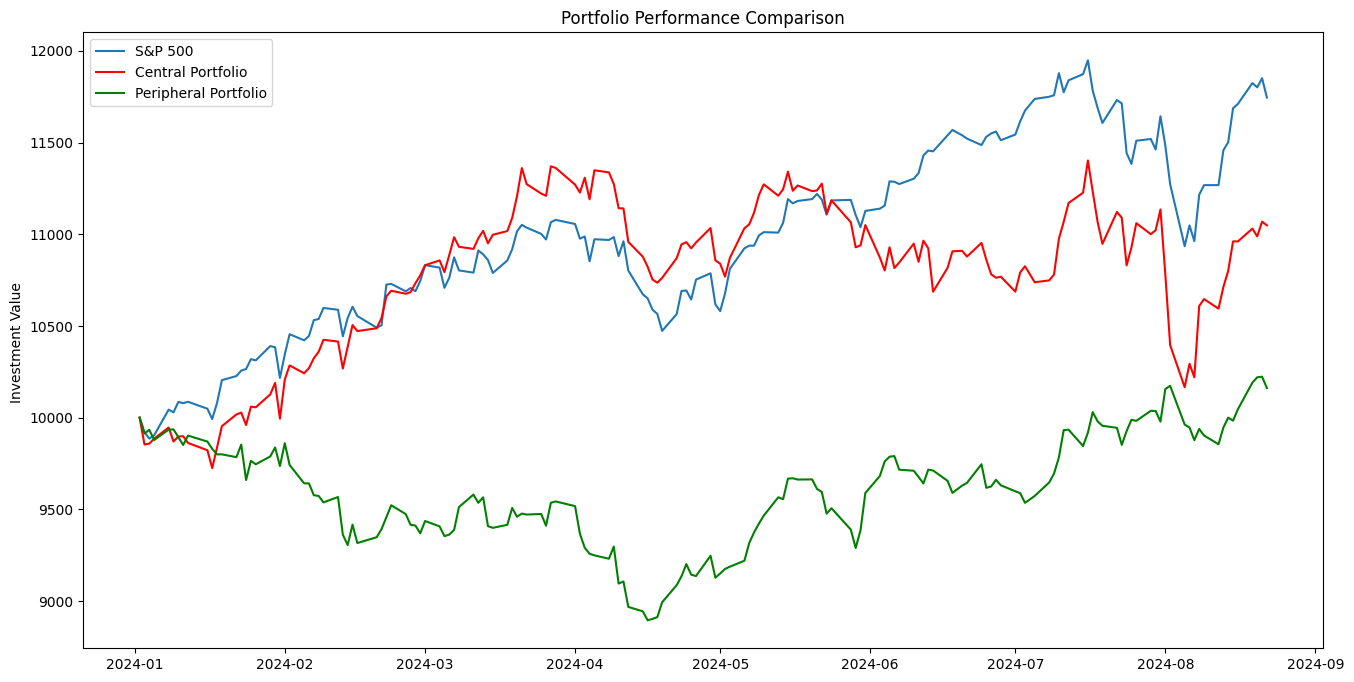

In [ ]:
figure, ax = plt.subplots(figsize=(16, 8))

# Plot S&P 500 values
snp_500_line = ax.plot(all_portfolios['sp500'], label='S&P 500')

# Plot Central Portfolio values
central_portfolio_line = ax.plot(all_portfolios['central_portfolio'], label= 'Central Portfolio', color= 'red')

# Plot Peripheral Portfolio values
peripheral_portfolio_line = ax.plot(all_portfolios['peripheral_portfolio'], label= 'Peripheral Portfolio', color= 'green')

ax.legend(loc='upper left')

# Title to the plot
ax.set_title('Portfolio Performance Comparison')

# Adding a title to the Y-axis
ax.set_ylabel('Investment Value ')

plt.show()

---
###**Observations and Insights**


- It is important to note that the Central and Peripheral Portfolios were constructed based on historical data (2010 to 2023). These portfolios were created using network analysis and centrality measures from this period, and their performance in 2024 reflects the continuation of trends identified in previous years.
- Despite the volatility the Central Portfolio ends up performing quite well following the S&P500 indicating that this portfolio is very responsive to market trends.
- The fact that the Peripheral Portfolio underperforms the S&P 500 and the Central Portfolio indicates that these stocks may lack the potential of the more central influential stocks in the market.

This case study notebook demonstrates the importance of using network analysis to understand the structure of the stock market. The use of networks in stock market analysis is very efficient because it allows for a more nuanced understanding of the relationships and influences between stocks helping to better understand and analyse the market dynamics.

-------
####**Let's Work Together:**

Christos Parapanisios - christosparapanisios@gmail.com

---